In [1]:
#importing libraries
import sqlite3
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import random
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#pip install mlxtend in command prompt

In [3]:
#connecting to the SQL database
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [4]:
cur = con.cursor()

# Overview of the Accident Table

In [5]:
col_accident = cur.execute(f"PRAGMA table_info(accident)")

In [6]:
accident_columns = []

In [7]:
for i in col_accident.fetchall():
    accident_columns.append(i[1])

In [8]:
accident_columns

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [9]:
accident_records = cur.execute("Select * FROM accident WHERE accident_year = 2020")

In [10]:
df_accident = pd.DataFrame(accident_records, columns = accident_columns)
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [11]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

# Overview of the Casualty Table

In [12]:
col_casualty = cur.execute(f"PRAGMA table_info(casualty)")

In [13]:
casualty_columns = []

In [14]:
for i in col_casualty.fetchall():
    casualty_columns.append(i[1])

In [15]:
casualty_columns

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

In [16]:
casualty_records = cur.execute("Select * FROM casualty WHERE accident_year = 2020")

In [17]:
df_casualty = pd.DataFrame(casualty_records, columns = casualty_columns)
df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [18]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

# Overview of the Lsoa Table

In [19]:
col_lsoa = cur.execute(f"PRAGMA table_info(lsoa)")

In [20]:
lsoa_columns = []

In [21]:
for i in col_lsoa.fetchall():
    lsoa_columns.append(i[1])

In [22]:
lsoa_columns

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

In [23]:
lsoa_records = cur.execute("Select * FROM lsoa")

In [24]:
df_lsoa = pd.DataFrame(lsoa_records, columns = lsoa_columns)
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [25]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


# Overview of the Vehicle Table

In [26]:
col_vehicle = cur.execute(f"PRAGMA table_info(vehicle)")

In [27]:
vehicle_columns = []

In [28]:
for i in col_vehicle.fetchall():
    vehicle_columns.append(i[1])

In [29]:
vehicle_columns

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

In [30]:
vehicle_records = cur.execute("Select * FROM vehicle WHERE accident_year = 2020")

In [31]:
df_vehicle = pd.DataFrame(vehicle_records, columns = vehicle_columns)
df_vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [32]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

# Data Cleaning

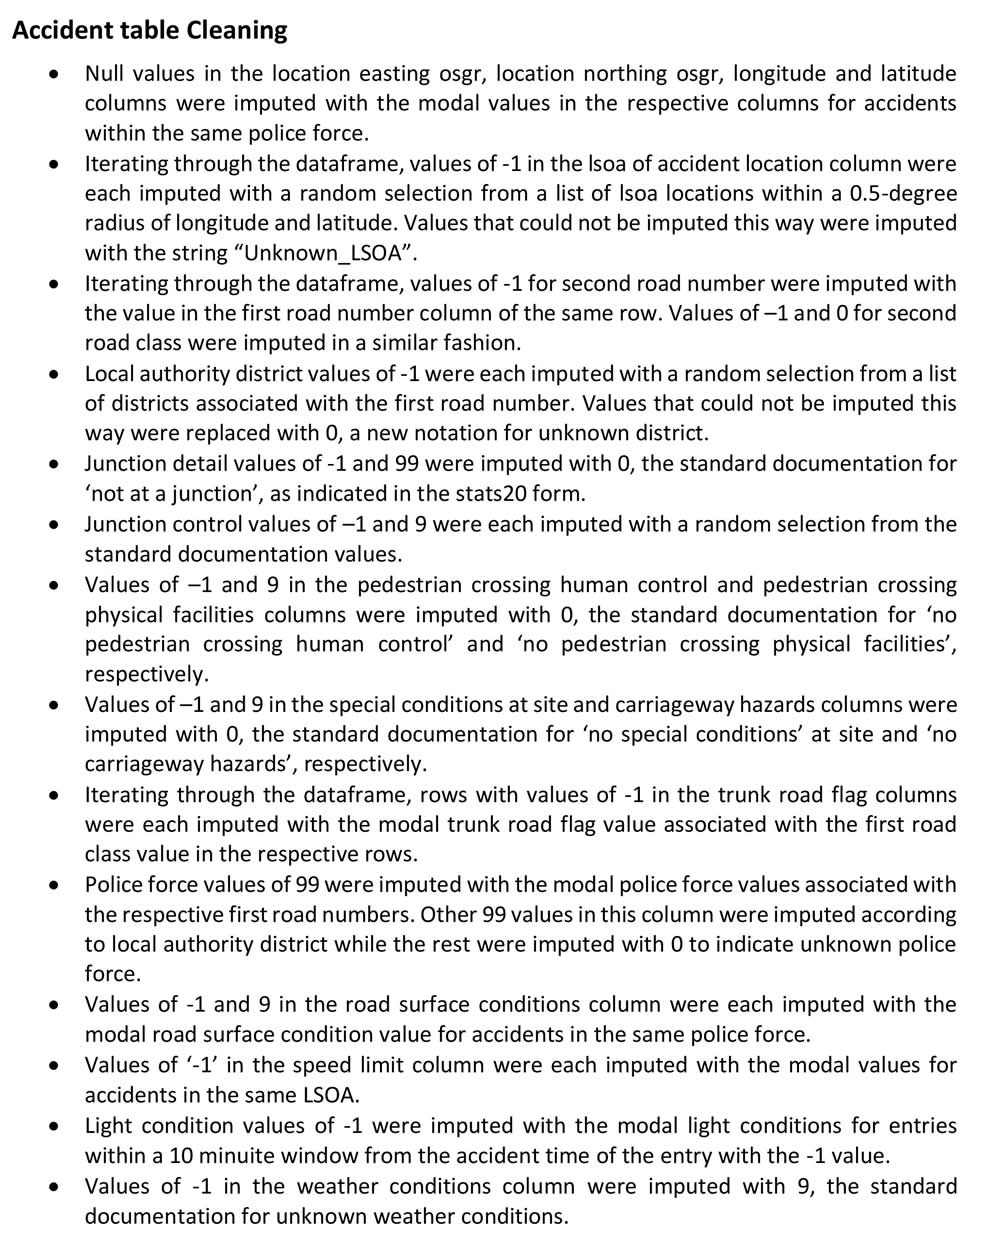

In [33]:
#imputing location easting osgr according to police force
for index, row in df_accident.iterrows():
    if pd.isna(row['location_easting_osgr']):
        police_force = row['police_force']
        relevant_rows = df_accident[df_accident['police_force'] == police_force]
        valid_values = relevant_rows['location_easting_osgr']
        
        if valid_values.empty:
            print(f"No valid values found for police_force {police_force}. Cannot calculate mean.")
        else:
            new_easting = valid_values.mean()
            df_accident.at[index, 'location_easting_osgr'] = new_easting

In [34]:
#imputing location northing osgr according to police force
for index, row in df_accident.iterrows():
    if pd.isna(row['location_northing_osgr']):
        police_force = row['police_force']
        relevant_rows = df_accident[df_accident['police_force'] == police_force]
        valid_values = relevant_rows['location_northing_osgr']
        
        if valid_values.empty:
            print(f"No valid values found for police_force {police_force}. Cannot calculate mean.")
        else:
            new_northing = valid_values.mean()
            df_accident.at[index, 'location_northing_osgr'] = new_northing


In [35]:
#imputing longitude according to police force
for index, row in df_accident.iterrows():
    if pd.isna(row['longitude']):
        police_force = row['police_force']
        relevant_rows = df_accident[df_accident['police_force'] == police_force]
        valid_values = relevant_rows['longitude']
        
        if valid_values.empty:
            print(f"No valid values found for police_force {police_force}. Cannot calculate mean.")
        else:
            new_longitude = valid_values.mean()
            df_accident.at[index, 'longitude'] = new_longitude

In [36]:
#imputing latitude according to police force
for index, row in df_accident.iterrows():
    if pd.isna(row['latitude']):
        police_force = row['police_force']
        relevant_rows = df_accident[df_accident['police_force'] == police_force]
        valid_values = relevant_rows['latitude']
        
        if valid_values.empty:
            print(f"No valid values found for police_force {police_force}. Cannot calculate mean.")
        else:
            new_latitude = valid_values.mean()
            df_accident.at[index, 'latitude'] = new_latitude

In [37]:
df_accident['first_road_number'].unique()

array([   0, 3036,   11, ..., 7003, 6404, 9057], dtype=int64)

In [38]:
df_accident['first_road_number'].min()

0

In [39]:
df_accident['first_road_number'].max()

9174

In [40]:
df_accident[df_accident['first_road_number'] == 0]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
6,2020010228014,2020,010228014,539764.0,179234.0,0.011959,51.494780,1,3,2,...,0,4,1,2,0,0,1,1,2,E01001667
10,2020010228022,2020,010228022,542576.0,167312.0,0.047641,51.386950,1,3,1,...,0,4,1,1,0,2,1,1,2,E01000662
13,2020010228032,2020,010228032,526375.0,174240.0,-0.182588,51.453048,1,2,3,...,0,4,1,2,0,0,1,1,2,E01004620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,0,4,1,2,0,0,1,2,-1,-1
91193,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,0,1,2,2,0,7,2,2,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [41]:
df_accident[df_accident['first_road_number'] == 0]['police_force'].unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [42]:
#first road number 0 takes up a large fraction of the dataset.
#seems abnormal especially as it spans through so many police forces.
#but then again it could be a major highway spanning across most of great britain.

In [43]:
df_accident['second_road_number'].unique()

array([  -1,    0,  406, ...,  999,   87, 7019], dtype=int64)

In [44]:
df_accident[df_accident['second_road_number'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
12,2020010228031,2020,010228031,553943.0,190802.0,0.221108,51.595036,1,3,2,...,9,1,7,1,0,0,1,3,2,E01002293
13,2020010228032,2020,010228032,526375.0,174240.0,-0.182588,51.453048,1,2,3,...,0,4,1,2,0,0,1,1,2,E01004620
15,2020010228038,2020,010228038,553007.0,190580.0,0.207510,51.593297,1,1,1,...,0,4,7,2,0,0,2,1,2,E01002337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,2020991017285,2020,991017285,343287.0,732055.0,-2.922301,56.477171,99,2,1,...,4,4,1,1,0,0,1,1,-1,-1
91186,2020991020957,2020,991020957,253049.0,666010.0,-4.349740,55.864792,99,3,2,...,0,1,2,1,0,0,1,1,-1,-1
91191,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,99,3,2,...,4,1,1,1,0,0,2,1,-1,-1
91193,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,0,1,2,2,0,7,2,2,-1,-1


In [45]:
df_accident[df_accident['second_road_number'] == df_accident['first_road_number']]
#checking for number of instances where first road number = second road number

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
6,2020010228014,2020,010228014,539764.0,179234.0,0.011959,51.494780,1,3,2,...,0,4,1,2,0,0,1,1,2,E01001667
9,2020010228020,2020,010228020,529718.0,192342.0,-0.127840,51.614971,1,3,2,...,5,4,1,1,0,0,1,1,2,E01001530
10,2020010228022,2020,010228022,542576.0,167312.0,0.047641,51.386950,1,3,1,...,0,4,1,1,0,2,1,1,2,E01000662
14,2020010228037,2020,010228037,529918.0,163201.0,-0.135664,51.353040,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91189,2020991023621,2020,991023621,341791.0,733677.0,-2.946947,56.491558,99,2,1,...,0,1,9,2,0,0,1,2,-1,-1
91190,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,0,4,1,2,0,0,1,2,-1,-1
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1


In [46]:
#imputing -1 values in the second road number column with the values from the first road number column
for index, row in df_accident.iterrows():
    if row['second_road_number'] == -1:
        df_accident.at[index, 'second_road_number'] = row['first_road_number']

In [47]:
df_accident['first_road_class'].unique()

array([6, 3, 5, 4, 1, 2], dtype=int64)

In [48]:
df_accident['second_road_class'].unique()

array([ 0,  6,  5,  3,  4,  1, -1,  2], dtype=int64)

In [49]:
df_accident[df_accident['second_road_class'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,9,4,9,9,9,9,1,3,2,E01033756
25438,2020052002317,2020,052002317,334627.0,399720.0,-2.986758,53.490126,5,3,2,...,1,4,1,1,0,0,1,1,2,E01007086
25560,2020052002504,2020,052002504,346868.0,390532.0,-2.800731,53.408928,5,3,2,...,0,4,1,1,0,0,2,2,2,E01006501
25594,2020052002556,2020,052002556,321710.0,385999.0,-3.177985,53.365056,5,2,1,...,0,4,1,2,0,0,1,1,2,E01007281
25631,2020052002610,2020,052002610,341987.0,397862.0,-2.875501,53.474291,5,3,1,...,1,1,1,1,0,0,1,3,2,E01006434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86279,2020622000848,2020,622000848,290727.0,178973.0,-3.575625,51.499100,62,3,3,...,0,1,1,1,0,0,1,1,-1,W01001036
86394,2020622000969,2020,622000969,318085.0,177732.0,-3.181307,51.492576,62,3,2,...,0,4,1,1,0,0,1,1,-1,W01001722
86397,2020622000973,2020,622000973,317616.0,172399.0,-3.186817,51.444566,62,3,2,...,0,1,1,1,0,0,1,1,-1,W01001076
86411,2020622000988,2020,622000988,320077.0,177332.0,-3.152530,51.489266,62,3,1,...,0,4,1,1,0,0,1,1,-1,W01001698


In [50]:
df_accident[df_accident['second_road_class'] == 0]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
12,2020010228031,2020,010228031,553943.0,190802.0,0.221108,51.595036,1,3,2,...,9,1,7,1,0,0,1,3,2,E01002293
13,2020010228032,2020,010228032,526375.0,174240.0,-0.182588,51.453048,1,2,3,...,0,4,1,2,0,0,1,1,2,E01004620
15,2020010228038,2020,010228038,553007.0,190580.0,0.207510,51.593297,1,1,1,...,0,4,7,2,0,0,2,1,2,E01002337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91184,2020991017285,2020,991017285,343287.0,732055.0,-2.922301,56.477171,99,2,1,...,4,4,1,1,0,0,1,1,-1,-1
91186,2020991020957,2020,991020957,253049.0,666010.0,-4.349740,55.864792,99,3,2,...,0,1,2,1,0,0,1,1,-1,-1
91191,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,99,3,2,...,4,1,1,1,0,0,2,1,-1,-1
91193,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,0,1,2,2,0,7,2,2,-1,-1


In [51]:
df_accident[df_accident['second_road_class'] == df_accident['first_road_class']]
#checking for number of instances where first road class = second road class

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
6,2020010228014,2020,010228014,539764.0,179234.0,0.011959,51.494780,1,3,2,...,0,4,1,2,0,0,1,1,2,E01001667
9,2020010228020,2020,010228020,529718.0,192342.0,-0.127840,51.614971,1,3,2,...,5,4,1,1,0,0,1,1,2,E01001530
10,2020010228022,2020,010228022,542576.0,167312.0,0.047641,51.386950,1,3,1,...,0,4,1,1,0,2,1,1,2,E01000662
18,2020010228060,2020,010228060,517380.0,184787.0,-0.308476,51.549775,1,3,2,...,0,1,1,1,0,0,1,1,2,E01000612
28,2020010228124,2020,010228124,522606.0,187292.0,-0.232268,51.571179,1,3,1,...,0,7,8,1,0,0,1,3,2,E01000305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91189,2020991023621,2020,991023621,341791.0,733677.0,-2.946947,56.491558,99,2,1,...,0,1,9,2,0,0,1,2,-1,-1
91190,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,0,4,1,2,0,0,1,2,-1,-1
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1


In [52]:
#imputing -1 and 0 values in the second road class column with the values from the first road class column
for index, row in df_accident.iterrows():
    if row['second_road_class'] in [-1,0]:
        df_accident.at[index, 'second_road_class'] = row['first_road_class']

In [53]:
df_accident['second_road_class'].unique()

array([6, 3, 5, 4, 1, 2], dtype=int64)

In [54]:
df_accident[df_accident['lsoa_of_accident_location'] == '-1']

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25520,2020052002442,2020,052002442,337857.478438,393146.562937,-2.936763,53.431395,5,2,2,...,0,1,1,1,0,0,3,1,2,-1
29452,2020070769852,2020,070769852,362384.656388,374051.135830,-2.565411,53.261902,7,3,2,...,0,1,1,1,0,0,3,1,2,-1
32689,2020122001194,2020,122001194,450368.515691,466223.832909,-1.231189,54.088556,12,3,2,...,0,1,2,2,0,0,3,1,2,-1
33578,2020137330369,2020,137330369,423549.036916,429189.432501,-1.644319,53.758439,13,3,2,...,0,1,1,1,0,0,3,1,1,-1
78198,2020500966926,2020,500966926,243533.000000,58802.000000,-4.203369,50.408188,50,3,2,...,0,1,1,1,0,0,2,2,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.000000,731654.000000,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.000000,658891.000000,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.000000,810646.000000,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.000000,674852.000000,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [55]:
#imputing -1 values in the lsoa_of_accident_location column with a random selection from a list of lsoa locations within a 0.5 degree radius of longitude and latitude
#imputing remaining -1 values in the lsoa_of_accident_location column with the string 'Unknown_LSOA'
for index, row in df_accident.iterrows():
    if row['lsoa_of_accident_location'] == '-1':
        long = row['longitude']
        lat = row['latitude']
        lsoa_filtered = df_accident[
            (df_accident['longitude'].between(long - 0.5, long + 0.5)) &
            (df_accident['latitude'].between(lat - 0.5, lat + 0.5)) &
            (df_accident['lsoa_of_accident_location'] != '-1')]
        non_missing_values = lsoa_filtered['lsoa_of_accident_location'].tolist()
        if non_missing_values:
            random_value = random.choice(non_missing_values)
            df_accident.at[index, 'lsoa_of_accident_location'] = random_value
        else:
            df_accident.at[index, 'lsoa_of_accident_location'] = 'Unknown_LSOA'

In [56]:
df_accident[df_accident['lsoa_of_accident_location'] == 'Unknown_LSOA']

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
87363,2020990914642,2020,990914642,323358.0,657433.0,-3.224260,55.804069,99,3,1,...,0,6,1,2,0,0,2,2,-1,Unknown_LSOA
87364,2020990914656,2020,990914656,328344.0,674151.0,-3.149167,55.955012,99,2,2,...,5,1,1,1,0,0,1,2,-1,Unknown_LSOA
87365,2020990914685,2020,990914685,251672.0,669243.0,-4.373494,55.893393,99,2,3,...,0,4,1,2,0,0,1,1,-1,Unknown_LSOA
87366,2020990914694,2020,990914694,250320.0,835075.0,-4.491377,57.381401,99,2,1,...,0,6,4,2,0,0,2,2,-1,Unknown_LSOA
87367,2020990914700,2020,990914700,187099.0,688602.0,-5.419630,56.042804,99,3,1,...,0,4,1,1,0,0,2,2,-1,Unknown_LSOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,Unknown_LSOA
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,Unknown_LSOA
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,Unknown_LSOA
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,Unknown_LSOA


In [57]:
df_accident['local_authority_district'].unique()

array([ 10,   9,   1,  17,   7,   6,   5,  31,  32,  19,  15,  21,   3,
        28,  20,  12,  30,  14,  16,  23,   4,   8,  22,  26,   2,  25,
        11,  27,  13,  18,  24,  29,  57,  -1,  63,  64,  62,  65,  60,
        61,  71,  82,  85,  79,  77,  74,  76,  70,  75,  72,  84,  83,
        73,  80,  91,  95,  90,  93,  92, 102, 107, 110, 109, 100, 114,
       112, 101, 106, 104, 128, 130, 129, 124, 147, 150, 139, 148, 146,
       149, 169, 161, 180, 186, 185, 189, 182, 187, 181, 184, 204, 203,
       206, 200, 202, 211, 210, 215, 213, 228, 232, 233, 231, 240, 241,
       243, 245, 306, 305, 300, 309, 307, 303, 302, 253, 252, 255, 251,
       257, 256, 250, 254, 258, 270, 274, 286, 278, 273, 284, 285, 276,
       277, 291, 290, 293, 294, 292, 321, 320, 325, 324, 328, 329, 323,
       327, 322, 340, 344, 343, 345, 341, 346, 342, 347, 354, 350, 352,
       351, 355, 356, 353, 362, 364, 363, 367, 368, 360, 366, 365, 361,
       380, 382, 383, 381, 385, 384, 386, 390, 392, 395, 394, 39

In [58]:
df_accident[df_accident['local_authority_district'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
20886,2020010916585,2020,010916585,554799.000000,194187.000000,0.234951,51.625215,1,3,2,...,0,4,1,2,0,0,2,1,1,E01002276
20887,2020010922915,2020,010922915,544987.000000,192610.000000,0.092654,51.613656,1,3,2,...,0,1,5,2,0,0,1,1,2,E01003725
20888,2020010931381,2020,010931381,533681.000000,180745.000000,-0.075042,51.509829,1,3,2,...,5,4,1,1,0,0,1,2,2,E01004293
20889,2020010932267,2020,010932267,531162.000000,181123.000000,-0.111179,51.513816,1,3,2,...,5,1,1,1,0,0,1,1,2,E01004735
20890,2020010935064,2020,010935064,533550.000000,180777.000000,-0.076916,51.510148,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86668,202063A025020,2020,63A025020,255597.081258,238145.057667,-4.103371,52.021527,63,3,2,...,0,1,2,2,0,0,3,2,-1,W01001049
86705,202063A035620,2020,63A035620,255597.081258,238145.057667,-4.103371,52.021527,63,3,1,...,0,1,1,1,0,0,3,2,-1,W01000679
86785,202063A059120,2020,63A059120,255597.081258,238145.057667,-4.103371,52.021527,63,3,2,...,0,1,1,1,0,0,3,2,-1,W01000647
86916,202063B033320,2020,63B033320,260040.000000,280830.000000,-4.058956,52.407537,63,3,2,...,0,1,9,1,0,0,1,2,-1,W01001935


In [59]:
#imputing local authority district values of -1 with a random selection from a list of districts associated with the first road number
for index, row in df_accident.iterrows():
    if row['local_authority_district'] == -1:
        frn = row['first_road_number']
        lad_filtered = df_accident[df_accident['first_road_number'] == frn]
        non_missing_values = lad_filtered['local_authority_district'].tolist()
        if non_missing_values:
            random_value = random.choice(non_missing_values)
            df_accident.at[index, 'local_authority_district'] = random_value

In [60]:
df_accident[df_accident['local_authority_district'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
25734,2020060373934,2020,060373934,392472.000000,385384.000000,-2.114590,53.365287,6,2,2,...,0,1,1,1,0,0,1,1,2,E01005807
37749,20201478P1266,2020,1478P1266,450726.000000,413630.000000,-1.234661,53.616785,14,3,2,...,0,1,1,1,0,0,2,2,2,E01007587
44724,2020211025634,2020,211025634,409562.000000,300603.000000,-1.860240,52.603147,21,3,4,...,0,4,1,1,0,0,2,1,2,E01029514
54053,2020350949556,2020,350949556,565093.000000,266068.000000,0.418020,52.268003,35,3,4,...,0,1,1,1,0,0,2,1,1,E01018035
56267,2020370915765,2020,370915765,640171.000000,272836.000000,1.521200,52.301115,37,2,1,...,0,1,1,2,0,0,2,1,2,E01030219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86550,2020622100003,2020,622100003,310696.000000,187222.000000,-3.290124,51.576763,62,3,2,...,0,1,1,1,0,0,2,1,-1,W01001184
86567,2020622100027,2020,622100027,307591.000000,200655.000000,-3.338470,51.697012,62,3,2,...,0,1,1,1,0,0,2,1,-1,W01001304
86577,2020622100049,2020,622100049,320750.000000,178051.000000,-3.143001,51.495825,62,3,3,...,0,4,1,1,0,0,1,1,-1,W01001825
86582,2020622100085,2020,622100085,307528.000000,200210.000000,-3.339263,51.693002,62,3,2,...,0,4,9,2,0,0,2,1,-1,W01001302


In [61]:
df_accident['local_authority_district'] = df_accident['local_authority_district'].replace(-1, 0)
#Zero becomes the new notation for unknown local authority district

In [62]:
df_accident['local_authority_highway'].unique()

array(['E09000032', 'E09000022', 'E09000033', 'E09000025', 'E09000023',
       'E09000011', 'E09000030', 'E09000014', 'E09000010', 'E09000006',
       'E09000016', 'E09000029', 'E09000019', 'E09000005', 'E09000008',
       'E09000020', 'E09000003', 'E09000026', 'E09000002', 'E09000021',
       'E09000012', 'E09000028', 'E09000024', 'E09000017', 'E09000018',
       'E09000013', 'E09000009', 'E09000031', 'E09000004', 'E09000027',
       'E09000007', 'E09000015', 'EHEATHROW', 'E10000006', 'E06000009',
       'E10000017', 'E06000008', 'E08000013', 'E08000015', 'E08000011',
       'E08000012', 'E08000014', 'E08000007', 'E08000010', 'E08000001',
       'E08000005', 'E08000003', 'E08000006', 'E08000008', 'E08000009',
       'E08000002', 'E08000004', 'E06000007', 'E06000006', 'E06000050',
       'E06000049', 'E08000021', 'E08000024', 'E06000048', 'E08000022',
       'E08000020', 'E08000023', 'E06000047', 'E06000005', 'E10000023',
       'E06000014', 'E08000035', 'E08000034', 'E08000036', 'E080

In [63]:
df_accident['junction_detail'].unique()

array([ 0,  9,  3,  6,  1, 99,  7,  8,  2,  5, -1], dtype=int64)

In [64]:
df_accident[df_accident['junction_detail'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
65042,2020432316294,2020,432316294,482277.0,238418.0,-0.801898,52.038080,43,3,2,...,0,1,1,1,0,0,1,3,2,E01016815
80880,2020522003678,2020,522003678,375358.0,165623.0,-2.355525,51.389105,52,3,2,...,0,1,1,1,0,0,1,2,2,E01014371


In [65]:
df_accident[df_accident['junction_detail'] == 99]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,9,4,9,9,9,0,1,3,2,E01002030
34,2020010228145,2020,010228145,532411.0,167385.0,-0.098327,51.390066,1,3,2,...,0,4,1,1,0,0,1,3,2,E01001115
46,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,1,3,2,...,0,1,1,1,0,0,1,3,2,E01003371
54,2020010228240,2020,010228240,534659.0,178273.0,-0.061900,51.487383,1,3,2,...,9,1,1,1,0,0,1,3,2,E01004038
89,2020010228351,2020,010228351,532797.0,189181.0,-0.084592,51.585847,1,3,2,...,0,1,1,2,0,0,1,3,2,E01002067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20866,2020010295245,2020,010295245,533746.0,193046.0,-0.069430,51.620355,1,3,1,...,9,1,1,1,9,0,1,3,2,E01001428
20875,2020010302554,2020,010302554,518721.0,166976.0,-0.295123,51.389416,1,3,1,...,9,4,8,1,9,0,1,3,2,E01002925
20876,2020010303004,2020,010303004,533903.0,190434.0,-0.068160,51.596845,1,3,2,...,9,4,1,1,0,0,1,3,2,E01002077
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,9,4,9,9,9,9,1,3,2,E01033756


In [66]:
df_accident['junction_detail'] = df_accident['junction_detail'].replace([-1,99],0)
#0 indicates not at a junction (from supporting documentation)

In [67]:
df_accident['junction_detail'].unique()

array([0, 9, 3, 6, 1, 7, 8, 2, 5], dtype=int64)

In [68]:
df_accident['junction_control'].unique()

array([-1,  2,  1,  4,  9,  3], dtype=int64)

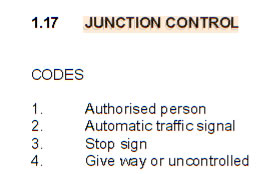

In [69]:
df_accident[df_accident['junction_control'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
12,2020010228031,2020,010228031,553943.0,190802.0,0.221108,51.595036,1,3,2,...,9,1,7,1,0,0,1,3,2,E01002293
13,2020010228032,2020,010228032,526375.0,174240.0,-0.182588,51.453048,1,2,3,...,0,4,1,2,0,0,1,1,2,E01004620
15,2020010228038,2020,010228038,553007.0,190580.0,0.207510,51.593297,1,1,1,...,0,4,7,2,0,0,2,1,2,E01002337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91186,2020991020957,2020,991020957,253049.0,666010.0,-4.349740,55.864792,99,3,2,...,0,1,2,1,0,0,1,1,-1,Unknown_LSOA
91191,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,99,3,2,...,4,1,1,1,0,0,2,1,-1,Unknown_LSOA
91193,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,0,1,2,2,0,7,2,2,-1,Unknown_LSOA
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,Unknown_LSOA


In [70]:
df_accident[df_accident['junction_control'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,9,4,9,9,9,0,1,3,2,E01002030
34,2020010228145,2020,010228145,532411.0,167385.0,-0.098327,51.390066,1,3,2,...,0,4,1,1,0,0,1,3,2,E01001115
46,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,1,3,2,...,0,1,1,1,0,0,1,3,2,E01003371
54,2020010228240,2020,010228240,534659.0,178273.0,-0.061900,51.487383,1,3,2,...,9,1,1,1,0,0,1,3,2,E01004038
89,2020010228351,2020,010228351,532797.0,189181.0,-0.084592,51.585847,1,3,2,...,0,1,1,2,0,0,1,3,2,E01002067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20866,2020010295245,2020,010295245,533746.0,193046.0,-0.069430,51.620355,1,3,1,...,9,1,1,1,9,0,1,3,2,E01001428
20875,2020010302554,2020,010302554,518721.0,166976.0,-0.295123,51.389416,1,3,1,...,9,4,8,1,9,0,1,3,2,E01002925
20876,2020010303004,2020,010303004,533903.0,190434.0,-0.068160,51.596845,1,3,2,...,9,4,1,1,0,0,1,3,2,E01002077
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,9,4,9,9,9,9,1,3,2,E01033756


In [71]:
choices = list(range(1, 5))

for index, row in df_accident.iterrows():
    if row['junction_control'] in [-1,9]:
        df_accident.at[index, 'junction_control'] = random.choice(choices)

In [72]:
df_accident['pedestrian_crossing_human_control'].unique()

array([ 9,  0,  2,  1, -1], dtype=int64)

In [73]:
df_accident[df_accident['pedestrian_crossing_human_control'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.651230,3,3,1,...,-1,4,5,2,-1,-1,2,2,2,E01019089
29707,2020100928025,2020,100928025,434725.0,572130.0,-1.458142,55.042479,10,3,2,...,-1,7,1,1,0,0,1,2,2,E01008586
29829,2020100935233,2020,100935233,425337.0,563390.0,-1.605819,54.964507,10,3,1,...,-1,1,1,1,0,0,1,2,2,E01008168
29834,2020100935403,2020,100935403,424645.0,563994.0,-1.616575,54.969968,10,3,1,...,4,4,2,2,0,0,1,2,2,E01033543
30017,2020100948112,2020,100948112,424383.0,573697.0,-1.619845,55.057172,10,3,2,...,-1,1,1,1,0,0,2,2,2,E01008582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,-1,-1,-1,2,-1,2,E01029085
81794,2020530933544,2020,530933544,385838.0,218187.0,-2.207055,51.862090,53,3,1,...,1,1,5,2,0,0,1,2,2,E01022287
82325,2020531007045,2020,531007045,381547.0,221226.0,-2.269531,51.889288,53,3,2,...,-1,1,1,2,0,0,2,2,2,E01022443
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.642790,99,3,2,...,-1,4,8,-1,-1,-1,1,2,-1,Unknown_LSOA


In [74]:
df_accident[df_accident['pedestrian_crossing_human_control'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
12,2020010228031,2020,010228031,553943.0,190802.0,0.221108,51.595036,1,3,2,...,9,1,7,1,0,0,1,3,2,E01002293
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,9,4,9,9,9,0,1,3,2,E01002030
37,2020010228155,2020,010228155,549043.0,183451.0,0.147310,51.530303,1,3,1,...,9,7,7,1,0,0,1,3,2,E01000095
50,2020010228233,2020,010228233,541393.0,191088.0,0.040169,51.600893,1,3,2,...,9,1,1,2,0,0,1,3,2,E01003761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,202001T246170,2020,01T246170,533386.0,181909.0,-0.078850,51.520359,1,3,2,...,9,1,9,9,9,9,1,3,2,E01004307
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,9,4,9,9,9,9,1,3,2,E01033756
24683,2020052001134,2020,052001134,331400.0,398571.0,-3.035134,53.479388,5,3,2,...,9,1,1,1,9,0,1,3,2,E01006954
25538,2020052002466,2020,052002466,336978.0,388207.0,-2.949022,53.386944,5,3,1,...,9,1,1,1,0,0,1,3,2,E01006675


In [75]:
df_accident['pedestrian_crossing_human_control'] = df_accident['pedestrian_crossing_human_control'].replace([-1,9,],0)

In [76]:
df_accident['pedestrian_crossing_human_control'].unique()
#0 indicates no pedestrian crossing human control nearby (from supporting documentation)

array([0, 2, 1], dtype=int64)

In [77]:
df_accident['pedestrian_crossing_physical_facilities'].unique()

array([ 9,  4,  0,  5,  1,  8,  7, -1], dtype=int64)

In [78]:
df_accident[df_accident['pedestrian_crossing_physical_facilities'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.651230,3,3,1,...,-1,4,5,2,-1,-1,2,2,2,E01019089
29707,2020100928025,2020,100928025,434725.0,572130.0,-1.458142,55.042479,10,3,2,...,-1,7,1,1,0,0,1,2,2,E01008586
29829,2020100935233,2020,100935233,425337.0,563390.0,-1.605819,54.964507,10,3,1,...,-1,1,1,1,0,0,1,2,2,E01008168
30017,2020100948112,2020,100948112,424383.0,573697.0,-1.619845,55.057172,10,3,2,...,-1,1,1,1,0,0,2,2,2,E01008582
31056,2020101006509,2020,101006509,425870.0,577080.0,-1.596262,55.087496,10,3,2,...,-1,1,1,-1,-1,-1,2,2,2,E01027404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,2020470970374,2020,470970374,530561.0,105130.0,-0.147408,50.830984,47,3,2,...,-1,1,9,-1,-1,-1,1,2,2,E01016967
79211,2020501005015,2020,501005015,202307.0,53568.0,-4.780158,50.348746,50,3,1,...,-1,1,1,1,0,0,1,2,2,E01019045
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,-1,-1,-1,-1,-1,-1,2,-1,2,E01029085
82325,2020531007045,2020,531007045,381547.0,221226.0,-2.269531,51.889288,53,3,2,...,-1,1,1,2,0,0,2,2,2,E01022443


In [79]:
df_accident[df_accident['pedestrian_crossing_physical_facilities'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
12,2020010228031,2020,010228031,553943.0,190802.0,0.221108,51.595036,1,3,2,...,9,1,7,1,0,0,1,3,2,E01002293
17,2020010228045,2020,010228045,534220.0,181589.0,-0.066958,51.517286,1,3,2,...,9,4,1,1,0,0,1,3,2,E01004309
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,9,4,9,9,9,0,1,3,2,E01002030
37,2020010228155,2020,010228155,549043.0,183451.0,0.147310,51.530303,1,3,1,...,9,7,7,1,0,0,1,3,2,E01000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32330,2020122000763,2020,122000763,422604.0,481212.0,-1.654796,54.226142,12,3,1,...,9,1,4,2,0,0,2,3,2,E01027685
64943,2020430438740,2020,430438740,485512.0,239307.0,-0.754525,52.045583,43,3,2,...,9,1,1,1,0,0,1,3,2,E01033499
64986,2020432003136,2020,432003136,490807.0,237977.0,-0.677691,52.032787,43,3,2,...,9,1,2,2,0,0,2,3,2,E01016735
64988,2020432003148,2020,432003148,488001.0,233445.0,-0.719746,51.992502,43,3,2,...,9,1,2,2,0,0,1,3,2,E01016710


In [80]:
df_accident['pedestrian_crossing_physical_facilities'] = df_accident['pedestrian_crossing_physical_facilities'].replace([-1,9,],0)

In [81]:
df_accident['pedestrian_crossing_physical_facilities'].unique()
#0 indicates no pedestrian crossing physical facilities nearby(from supporting documenation)

array([0, 4, 5, 1, 8, 7], dtype=int64)

In [82]:
df_accident['special_conditions_at_site'].unique()

array([ 0,  9,  2,  4,  5,  1,  3,  6,  7, -1], dtype=int64)

In [83]:
df_accident[df_accident['special_conditions_at_site'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21559,2020031001460,2020,031001460,298169.0,520399.0,-3.576569,54.568533,3,3,2,...,0,4,2,2,-1,-1,2,2,2,E01019270
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.651230,3,3,1,...,0,4,5,2,-1,-1,2,2,2,E01019089
21602,2020031008293,2020,031008293,350349.0,577415.0,-2.779421,55.088677,3,3,2,...,0,1,1,2,-1,0,2,2,2,E01019229
21626,2020031011876,2020,031011876,311983.0,483825.0,-3.352117,54.242531,3,3,2,...,0,1,8,2,-1,-1,2,2,2,E01019293
29795,2020100933338,2020,100933338,434350.0,550281.0,-1.466614,54.846175,10,3,1,...,0,7,5,2,-1,-1,1,2,2,E01008715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,2020470970374,2020,470970374,530561.0,105130.0,-0.147408,50.830984,47,3,2,...,0,1,9,-1,-1,-1,1,2,2,E01016967
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,0,-1,-1,-1,-1,-1,2,-1,2,E01029085
81786,2020530932163,2020,530932163,418974.0,225488.0,-1.725465,51.927598,53,3,1,...,0,1,1,1,-1,-1,2,2,2,E01022177
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.642790,99,3,2,...,0,4,8,-1,-1,-1,1,2,-1,Unknown_LSOA


In [84]:
df_accident[df_accident['special_conditions_at_site'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,0,4,9,9,9,0,1,3,2,E01002030
83,2020010228329,2020,010228329,535811.0,194463.0,-0.039070,51.632593,1,3,2,...,0,4,1,1,9,0,1,3,2,E01001477
93,2020010228375,2020,010228375,531295.0,164906.0,-0.115273,51.368046,1,3,2,...,0,4,8,2,9,9,1,3,2,E01001167
95,2020010228380,2020,010228380,516956.0,183261.0,-0.315095,51.536148,1,3,1,...,1,1,1,2,9,9,1,3,2,E01001347
154,2020010228565,2020,010228565,523741.0,185810.0,-0.216421,51.557612,1,3,2,...,0,7,2,9,9,9,1,3,2,E01000141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,202001T246170,2020,01T246170,533386.0,181909.0,-0.078850,51.520359,1,3,2,...,0,1,9,9,9,9,1,3,2,E01004307
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,0,4,9,9,9,9,1,3,2,E01033756
24683,2020052001134,2020,052001134,331400.0,398571.0,-3.035134,53.479388,5,3,2,...,0,1,1,1,9,0,1,3,2,E01006954
31937,2020122000318,2020,122000318,461605.0,451046.0,-1.062770,53.951871,12,3,2,...,0,1,9,9,9,0,1,3,2,E01013363


In [85]:
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'].replace([-1,9],0)

In [86]:
df_accident['special_conditions_at_site'].unique()
#0 indicates no special conditions at site (from supporting documentation)

array([0, 2, 4, 5, 1, 3, 6, 7], dtype=int64)

In [87]:
df_accident['carriageway_hazards'].unique()

array([ 0,  2,  9,  6,  3,  1,  7, -1], dtype=int64)

In [88]:
df_accident[df_accident['carriageway_hazards'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21559,2020031001460,2020,031001460,298169.0,520399.0,-3.576569,54.568533,3,3,2,...,0,4,2,2,0,-1,2,2,2,E01019270
21561,2020031002101,2020,031002101,304102.0,529475.0,-3.487808,54.651230,3,3,1,...,0,4,5,2,0,-1,2,2,2,E01019089
21597,2020031007981,2020,031007981,307097.0,536150.0,-3.443533,54.711757,3,3,1,...,0,4,1,1,0,-1,2,2,2,E01019093
21626,2020031011876,2020,031011876,311983.0,483825.0,-3.352117,54.242531,3,3,2,...,0,1,8,2,0,-1,2,2,2,E01019293
29795,2020100933338,2020,100933338,434350.0,550281.0,-1.466614,54.846175,10,3,1,...,0,7,5,2,0,-1,1,2,2,E01008715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75469,2020470970374,2020,470970374,530561.0,105130.0,-0.147408,50.830984,47,3,2,...,0,1,9,-1,0,-1,1,2,2,E01016967
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,0,-1,-1,-1,0,-1,2,-1,2,E01029085
81786,2020530932163,2020,530932163,418974.0,225488.0,-1.725465,51.927598,53,3,1,...,0,1,1,1,0,-1,2,2,2,E01022177
91094,2020991010132,2020,991010132,226757.0,642246.0,-4.754274,55.642790,99,3,2,...,0,4,8,-1,0,-1,1,2,-1,Unknown_LSOA


In [89]:
df_accident[df_accident['carriageway_hazards'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
93,2020010228375,2020,010228375,531295.0,164906.0,-0.115273,51.368046,1,3,2,...,0,4,8,2,0,9,1,3,2,E01001167
95,2020010228380,2020,010228380,516956.0,183261.0,-0.315095,51.536148,1,3,1,...,1,1,1,2,0,9,1,3,2,E01001347
149,2020010228555,2020,010228555,512347.0,179250.0,-0.382798,51.501032,1,3,1,...,1,4,8,1,0,9,1,3,2,E01001367
154,2020010228565,2020,010228565,523741.0,185810.0,-0.216421,51.557612,1,3,2,...,0,7,2,9,0,9,1,3,2,E01000141
218,2020010228799,2020,010228799,525786.0,172277.0,-0.191758,51.435537,1,3,2,...,0,1,9,9,0,9,1,3,2,E01003478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20864,2020010295127,2020,010295127,531270.0,166482.0,-0.115050,51.382215,1,3,2,...,5,1,1,1,0,9,1,3,2,E01001008
20883,2020010306670,2020,010306670,540086.0,178269.0,0.016211,51.486029,1,2,2,...,1,1,1,1,0,9,1,3,2,E01033738
20905,202001T246170,2020,01T246170,533386.0,181909.0,-0.078850,51.520359,1,3,2,...,0,1,9,9,0,9,1,3,2,E01004307
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,0,4,9,9,0,9,1,3,2,E01033756


In [90]:
df_accident['carriageway_hazards'] = df_accident['carriageway_hazards'].replace([-1,9],0)

In [91]:
df_accident['carriageway_hazards'].unique()
#0 indicates no carriageway hazards (from supporting documentation)

array([0, 2, 6, 3, 1, 7], dtype=int64)

In [92]:
df_accident['urban_or_rural_area'].unique()

array([1, 2, 3], dtype=int64)

In [93]:
df_accident['did_police_officer_attend_scene_of_accident'].unique()

array([ 3,  1,  2, -1], dtype=int64)

In [94]:
df_accident[df_accident['did_police_officer_attend_scene_of_accident'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,0,-1,-1,-1,0,0,2,-1,2,E01029085


In [95]:
df_accident['did_police_officer_attend_scene_of_accident'] = df_accident['did_police_officer_attend_scene_of_accident'].replace([-1,3], 2)

In [96]:
df_accident['did_police_officer_attend_scene_of_accident'].unique()
#2 represents no (whether self reported or not)

array([2, 1], dtype=int64)

In [97]:
df_accident['trunk_road_flag'].unique()

array([ 2,  1, -1], dtype=int64)

In [98]:
df_accident[df_accident['trunk_road_flag'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
84489,202060Y001159,2020,60Y001159,232114.0,331086.0,-4.494658,52.851044,60,3,2,...,0,1,1,1,0,0,2,1,-1,W01000080
84490,202060Y001269,2020,60Y001269,252536.0,371657.0,-4.210206,53.221455,60,3,2,...,0,4,1,2,0,0,2,1,-1,W01000008
84491,202060Y001304,2020,60Y001304,300594.0,381453.0,-3.493778,53.320654,60,3,1,...,0,7,1,1,0,0,1,2,-1,W01000240
84492,202060Y001562,2020,60Y001562,328262.0,351293.0,-3.071730,53.054074,60,3,1,...,0,1,1,1,0,0,2,1,-1,W01000363
84493,202060Y001607,2020,60Y001607,243868.0,376365.0,-4.342230,53.261261,60,3,2,...,0,1,1,1,0,0,2,1,-1,W01000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,Unknown_LSOA
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,Unknown_LSOA
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,Unknown_LSOA
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,Unknown_LSOA


A Trunk road is a major road, the column should therefore be a binary class with 1 indicating trunk road and 2 indicating not a trunk road. The -1 entries would be imputed with the modal trunk flag of rows with the same first road class

In [99]:
#imputing trunk road flag with the modal trunk road flag associated with the first road class
for index, row in df_accident.iterrows():
    if row['trunk_road_flag'] == -1:
        road_class = row['first_road_class']
        trunk_filtered = df_accident[(df_accident['first_road_class'] == road_class) & (df_accident['trunk_road_flag'] != -1)]
        modal_trunk = trunk_filtered['trunk_road_flag'].mode().values[0]
        if modal_trunk != '-1':
            df_accident.at[index, 'trunk_road_flag'] = modal_trunk

In [100]:
df_accident['trunk_road_flag'].unique()

array([2, 1], dtype=int64)

In [101]:
df_accident['police_force'].unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [102]:
df_accident[df_accident['police_force'] == 99]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
87363,2020990914642,2020,990914642,323358.0,657433.0,-3.224260,55.804069,99,3,1,...,0,6,1,2,0,0,2,2,2,Unknown_LSOA
87364,2020990914656,2020,990914656,328344.0,674151.0,-3.149167,55.955012,99,2,2,...,5,1,1,1,0,0,1,2,2,Unknown_LSOA
87365,2020990914685,2020,990914685,251672.0,669243.0,-4.373494,55.893393,99,2,3,...,0,4,1,2,0,0,1,1,2,Unknown_LSOA
87366,2020990914694,2020,990914694,250320.0,835075.0,-4.491377,57.381401,99,2,1,...,0,6,4,2,0,0,2,2,2,Unknown_LSOA
87367,2020990914700,2020,990914700,187099.0,688602.0,-5.419630,56.042804,99,3,1,...,0,4,1,1,0,0,2,2,2,Unknown_LSOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,2,Unknown_LSOA
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,2,Unknown_LSOA
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,2,Unknown_LSOA
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,2,Unknown_LSOA


In [103]:
#from the supporting document, there is no police force 99

In [104]:
#imputing police force according to first road number
for index, row in df_accident.iterrows():
    if row['police_force'] == 99:
        frn = row['first_road_number']
        pf_filtered = df_accident[df_accident['first_road_number'] == frn]
        modal_pf = pf_filtered['police_force'].mode().values[0]
        if modal_pf != 99:
            df_accident.at[index, 'police_force'] = modal_pf
        else:
            df_accident.at[index, 'police_force'] = 0

In [105]:
df_accident[df_accident['police_force'] == 0]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
87363,2020990914642,2020,990914642,323358.0,657433.0,-3.224260,55.804069,0,3,1,...,0,6,1,2,0,0,2,2,2,Unknown_LSOA
87366,2020990914694,2020,990914694,250320.0,835075.0,-4.491377,57.381401,0,2,1,...,0,6,4,2,0,0,2,2,2,Unknown_LSOA
87369,2020990915021,2020,990915021,276914.0,648279.0,-3.960655,55.712264,0,3,1,...,0,4,2,2,0,0,2,2,2,Unknown_LSOA
87372,2020990915091,2020,990915091,211532.0,757129.0,-5.077207,56.667822,0,3,2,...,0,1,2,2,0,0,2,1,2,Unknown_LSOA
87373,2020990915179,2020,990915179,295127.0,657417.0,-3.674437,55.798618,0,2,2,...,0,6,1,2,0,0,2,1,2,Unknown_LSOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91188,2020991023523,2020,991023523,257664.0,661852.0,-4.273881,55.828848,0,3,2,...,0,1,1,1,0,0,1,2,2,Unknown_LSOA
91191,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,0,3,2,...,4,1,1,1,0,0,2,1,2,Unknown_LSOA
91192,2020991024209,2020,991024209,294074.0,581458.0,-3.662274,55.116161,0,3,2,...,0,1,1,1,0,0,2,1,2,E01019115
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,0,2,2,...,0,1,1,1,0,0,1,1,2,Unknown_LSOA


In [106]:
#imputing police force according to local authority district
#remaining values are assigned 0
for index, row in df_accident.iterrows():
    if row['police_force'] == 0:
        lad = row['local_authority_district']
        pf_filtered = df_accident[df_accident['local_authority_district'] == lad]
        modal_pf = pf_filtered['police_force'].mode().values[0]
        if modal_pf != 0:
            df_accident.at[index, 'police_force'] = modal_pf
        else:
            df_accident.at[index, 'police_force'] = 0
            #0 becomes the new notation for unknown police force

In [107]:
df_accident[df_accident['police_force'] == 0]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
87363,2020990914642,2020,990914642,323358.0,657433.0,-3.224260,55.804069,0,3,1,...,0,6,1,2,0,0,2,2,2,Unknown_LSOA
87366,2020990914694,2020,990914694,250320.0,835075.0,-4.491377,57.381401,0,2,1,...,0,6,4,2,0,0,2,2,2,Unknown_LSOA
87369,2020990915021,2020,990915021,276914.0,648279.0,-3.960655,55.712264,0,3,1,...,0,4,2,2,0,0,2,2,2,Unknown_LSOA
87372,2020990915091,2020,990915091,211532.0,757129.0,-5.077207,56.667822,0,3,2,...,0,1,2,2,0,0,2,1,2,Unknown_LSOA
87373,2020990915179,2020,990915179,295127.0,657417.0,-3.674437,55.798618,0,2,2,...,0,6,1,2,0,0,2,1,2,Unknown_LSOA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91183,2020991017247,2020,991017247,277989.0,650526.0,-3.944559,55.732713,0,2,3,...,4,1,1,1,0,0,1,2,2,Unknown_LSOA
91185,2020991019256,2020,991019256,316541.0,691722.0,-3.343610,56.110929,0,3,2,...,5,4,8,2,0,0,1,1,2,Unknown_LSOA
91191,2020991024039,2020,991024039,298547.0,696827.0,-3.634775,56.153290,0,3,2,...,4,1,1,1,0,0,2,1,2,Unknown_LSOA
91192,2020991024209,2020,991024209,294074.0,581458.0,-3.662274,55.116161,0,3,2,...,0,1,1,1,0,0,2,1,2,E01019115


In [108]:
df_accident['police_force'].unique()

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63,  0], dtype=int64)

In [109]:
df_accident['road_surface_conditions'].unique()

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [110]:
df_accident[df_accident['road_surface_conditions'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
21032,2020030937290,2020,030937290,297437.000000,517966.000000,-3.587037,54.546529,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019280
21039,2020030939493,2020,030939493,299302.000000,516864.000000,-3.557841,54.537004,3,3,1,...,0,1,9,-1,0,0,1,2,2,E01019284
21042,2020030939726,2020,030939726,302614.000000,525794.000000,-3.509635,54.617876,3,3,2,...,0,1,9,-1,0,0,2,2,1,E01019101
21115,2020030951750,2020,030951750,300076.000000,510597.000000,-3.543758,54.480859,3,2,1,...,0,1,9,-1,0,0,2,2,2,E01019275
21134,2020030954846,2020,030954846,343036.000000,553924.000000,-2.889300,54.876823,3,3,2,...,0,1,9,-1,0,0,1,2,2,E01019213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86642,202063A017520,2020,63A017520,255597.081258,238145.057667,-4.103371,52.021527,63,3,2,...,0,1,9,-1,0,0,3,2,2,W01000711
86774,202063A056020,2020,63A056020,244350.000000,200870.000000,-4.252999,51.684963,63,3,2,...,0,7,9,-1,0,0,2,2,2,W01000711
87047,202063C034620,2020,63C034620,196200.000000,236630.000000,-4.969711,51.990646,63,3,2,...,0,1,9,-1,0,0,2,2,2,W01000565
91094,2020991010132,2020,991010132,226757.000000,642246.000000,-4.754274,55.642790,0,3,2,...,0,4,8,-1,0,0,1,2,2,Unknown_LSOA


In [111]:
df_accident[df_accident['road_surface_conditions'] == 9]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,0,1,9,9,0,0,1,2,2,E01004576
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,0,4,9,9,0,0,1,2,2,E01002030
154,2020010228565,2020,010228565,523741.0,185810.0,-0.216421,51.557612,1,3,2,...,0,7,2,9,0,0,1,2,2,E01000141
218,2020010228799,2020,010228799,525786.0,172277.0,-0.191758,51.435537,1,3,2,...,0,1,9,9,0,0,1,2,2,E01003478
305,2020010229062,2020,010229062,531631.0,183668.0,-0.103473,51.536578,1,2,1,...,0,4,9,9,0,0,1,2,2,E01002794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,5,3,2,...,0,4,9,9,0,0,1,2,2,E01033756
24911,2020052001478,2020,052001478,353323.0,393355.0,-2.704056,53.434913,5,2,2,...,0,4,9,9,0,0,1,2,2,E01006844
24947,2020052001532,2020,052001532,340211.0,388921.0,-2.900555,53.393736,5,3,2,...,0,4,9,9,0,0,1,2,2,E01006582
31937,2020122000318,2020,122000318,461605.0,451046.0,-1.062770,53.951871,12,3,2,...,0,1,9,9,0,0,1,2,2,E01013363


In [112]:
#imputing road surface conditions with the modal road surface condition in the police force
for index, row in df_accident.iterrows():
    if row['road_surface_conditions'] in [-1, 9]:
        pf = row['police_force']
        rsc_filtered = df_accident[(df_accident['police_force'] == pf) & (~df_accident['road_surface_conditions'].isin([-1, 9]))]
        modal_rsc = rsc_filtered['road_surface_conditions'].mode().values[0]
        if modal_rsc not in [-1,9]:
            df_accident.at[index, 'road_surface_conditions'] = modal_rsc
        else:
            df_accident.at[index, 'lsoa_of_accident_location'] = 0

In [113]:
df_accident['road_surface_conditions'].unique()

array([1, 2, 5, 4, 3], dtype=int64)

In [114]:
df_accident['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70, -1], dtype=int64)

In [115]:
df_accident[df_accident['speed_limit'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
1993,2020010234355,2020,010234355,548270.0,183677.0,0.136269,51.532537,1,3,1,...,1,4,1,1,0,0,1,1,2,E01000056
5381,2020010244932,2020,010244932,527033.0,179914.0,-0.171085,51.503893,1,3,1,...,0,1,1,1,0,0,1,1,2,E01004689
16520,2020010275266,2020,010275266,548903.0,183497.0,0.145312,51.530753,1,2,1,...,1,4,2,1,0,0,1,1,2,E01000095
18039,2020010279612,2020,010279612,540131.0,169512.0,0.013394,51.407327,1,3,1,...,0,1,2,2,0,0,1,2,2,E01000676
18264,2020010280179,2020,010280179,529031.0,163756.0,-0.148194,51.358229,1,3,1,...,0,1,9,1,0,0,1,2,2,E01004178
18487,2020010280770,2020,010280770,537440.0,185948.0,-0.018879,51.555683,1,3,2,...,1,1,7,1,0,0,1,2,2,E01004429
20496,2020010286380,2020,010286380,519882.0,179251.0,-0.274291,51.499495,1,2,1,...,0,7,1,1,0,0,1,2,2,E01001358
31115,2020101009449,2020,101009449,434889.0,570038.0,-1.455831,55.023670,10,2,1,...,1,4,2,1,0,0,1,2,2,E01008557
47041,2020231004014,2020,231004014,431195.0,286045.0,-1.542189,52.471470,23,3,1,...,0,1,1,2,0,0,2,1,2,E01031027
53894,2020350934310,2020,350934310,546182.0,257330.0,0.137331,52.194846,35,3,1,...,0,1,1,1,0,0,1,2,2,E01017987


In [116]:
#imputing speed limit with the modal speed limit is the lsoa of accident location
for index, row in df_accident.iterrows():
    if row['speed_limit'] == -1:
        lsoa = row['lsoa_of_accident_location']
        sl_filtered = df_accident[df_accident['lsoa_of_accident_location'] == lsoa]
        modal_sl = sl_filtered['speed_limit'].mode().values[0]
        if modal_sl != -1:
            df_accident.at[index, 'speed_limit'] = modal_sl

In [117]:
df_accident[df_accident['speed_limit'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
1993,2020010234355,2020,010234355,548270.0,183677.0,0.136269,51.532537,1,3,1,...,1,4,1,1,0,0,1,1,2,E01000056
20496,2020010286380,2020,010286380,519882.0,179251.0,-0.274291,51.499495,1,2,1,...,0,7,1,1,0,0,1,2,2,E01001358
31115,2020101009449,2020,101009449,434889.0,570038.0,-1.455831,55.023670,10,2,1,...,1,4,2,1,0,0,1,2,2,E01008557


In [118]:
df_accident['speed_limit'] = df_accident['speed_limit'].replace(-1,30)
#imputing remaining values of -1 for speed limit with 30

In [119]:
df_accident['speed_limit'].unique()

array([20, 30, 40, 50, 60, 70], dtype=int64)

In [120]:
df_accident['light_conditions'].unique()

array([ 1,  4,  5,  7,  6, -1], dtype=int64)

In [121]:
df_accident[df_accident['light_conditions'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
79777,2020520002488,2020,520002488,343681.0,154706.0,-2.809007,51.288686,52,1,1,...,0,-1,-1,1,0,0,2,2,2,E01029085


In [122]:
df_accident['time'] = pd.to_datetime(df_accident['time'], format='%H:%M')

In [123]:
#imputing light conditions with the modal light condtion associated with the timeframe of the accident
for index, row in df_accident.iterrows():
    if row['light_conditions'] in [-1, '-1']:
        time = row['time']
        time_window = pd.Timedelta(minutes=10)
        lc_filtered = df_accident[(df_accident['time'] >= time - time_window) & (df_accident['time'] <= time + time_window) & (df_accident.index != index)]
        modal_lc = lc_filtered['light_conditions'].mode().values
        if len(modal_lc) > 0 and modal_lc[0] not in [-1, '-1']:
            df_accident.at[index, 'light_conditions'] = modal_lc[0]
        else:
            df_accident.at[index, 'light_conditions'] = 'Unknown'

In [124]:
df_accident['time'] = df_accident['time'].dt.time

In [125]:
df_accident['light_conditions'].unique()

array([1, 4, 5, 7, 6], dtype=int64)

In [126]:
df_accident['weather_conditions'].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

In [127]:
df_accident['weather_conditions'] = df_accident['weather_conditions']. replace(-1, 9)
#replacing -1 values with 9 since 9 is the default notation for unknown weather

In [128]:
df_accident['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [129]:
df_accident['number_of_vehicles'].unique()

array([ 1,  2,  3,  4,  8,  6,  7,  5,  9, 10, 11, 13, 12], dtype=int64)

In [130]:
df_accident['number_of_casualties'].unique()

array([ 1,  2,  4,  3,  6,  5,  9, 11,  7,  8, 10, 17, 41, 13, 12, 19],
      dtype=int64)

In [131]:
df_accident[df_accident['number_of_casualties'] == 41]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
66993,2020440349165,2020,440349165,448114.0,132060.0,-1.314431,51.085841,44,2,1,...,0,1,1,1,0,0,2,1,2,E01023274


In [132]:
#Accident involves only one vehicle but 41 casualties
#investigate further in vehicle and casualty tables using accident index 2020440349165 to understand if this is an outlier or not

In [133]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

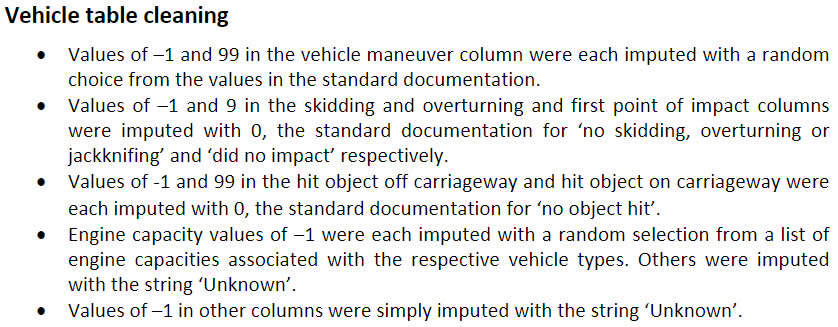

In [134]:
df_vehicle[df_vehicle['accident_index'] == '2020440349165'] #accident from accident table involving 41 casualties

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
123360,805076,2020440349165,2020,440349165,1,11,0,18,3,7,...,1,1,36,7,6700,2,13,ALEXANDER DENNIS MODEL MISSING,1,1


In [135]:
df_vehicle[df_vehicle['accident_index'] == '2020440349165']['hit_object_in_carriageway']

123360    5
Name: hit_object_in_carriageway, dtype: int64

In [136]:
df_vehicle[df_vehicle['accident_index'] == '2020440349165']['first_point_of_impact']

123360    1
Name: first_point_of_impact, dtype: int64

In [137]:
#vehicle type 11 = Bus or Coach (17 passengers or More)
#vehicle manoeuvre 18 = Going ahead
#hit_object_in_carriageway = 5 (hit a bridge roof)
#First Point of impact = 1 (impacted from the front)
'further investigation in casualty table'

'further investigation in casualty table'

In [138]:
df_vehicle['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [139]:
df_vehicle['vehicle_manoeuvre'].unique()

array([ 5,  4, 18,  3,  2, 99, 11,  1, 17,  9, 14, 13,  7, 15,  6, 16, 10,
        8, 12, -1], dtype=int64)

In [140]:
#imputing vehicle maneouvre with random choices from the appropriate list 
choices = list(range(1, 19))

for index, row in df_vehicle.iterrows():
    if row['vehicle_manoeuvre'] in [-1,99]:
        df_vehicle.at[index, 'vehicle_manoeuvre'] = random.choice(choices)

In [141]:
df_vehicle['skidding_and_overturning'].unique()

array([ 0,  2,  1,  9,  5, -1,  3,  4], dtype=int64)

In [142]:
df_vehicle['skidding_and_overturning'] = df_vehicle['skidding_and_overturning'].replace([-1,9],0)
#0 represents no skidding, overturning or jackknifing

In [143]:
df_vehicle['first_point_of_impact'].unique()

array([ 4,  1,  0,  2,  9,  3, -1], dtype=int64)

In [144]:
df_vehicle['first_point_of_impact'] = df_vehicle['first_point_of_impact'].replace([-1,9],0)
#0 represents did not impact

In [145]:
df_vehicle['engine_capacity_cc'].min()

-1

In [146]:
df_vehicle[df_vehicle['engine_capacity_cc']== -1]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
10,681726,2020010228018,2020,010228018,1,9,0,18,1,5,...,6,1,62,9,-1,-1,-1,-1,6,1
14,681730,2020010228022,2020,010228022,1,9,0,18,7,3,...,6,1,-1,-1,-1,-1,-1,-1,-1,-1
32,681748,2020010228077,2020,010228077,2,2,0,18,8,4,...,6,1,19,4,-1,-1,-1,-1,5,1
33,681749,2020010228086,2020,010228086,1,3,0,18,7,3,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167362,849078,2020991024039,2020,991024039,1,9,0,1,2,6,...,6,1,35,6,-1,-1,-1,-1,2,1
167366,849082,2020991024526,2020,991024526,1,98,0,18,6,2,...,1,1,43,7,-1,-1,-1,-1,3,1
167367,849083,2020991027064,2020,991027064,1,9,0,16,3,7,...,1,1,27,6,-1,-1,-1,-1,2,1
167368,849084,2020991027064,2020,991027064,2,1,0,5,1,5,...,5,1,11,3,-1,-1,-1,-1,2,1


In [147]:
#imputing engine capacity with a random selection of engine capacity from a list of engine capacities for the vehicle type
#imputing those that can be imputed as above with the string 'Unknown'
for index, row in df_vehicle.iterrows():
    if row['engine_capacity_cc'] == -1:
        veh_types = df_vehicle[(df_vehicle['vehicle_type'] == row['vehicle_type']) & (df_vehicle['engine_capacity_cc'] != -1)]
        non_missing_values = veh_types['engine_capacity_cc'].tolist()
        if non_missing_values:
            random_value = random.choice(non_missing_values)
            df_vehicle.at[index, 'engine_capacity_cc'] = random_value
        else:
            df_vehicle.at[index, 'engine_capacity_cc'] = 'Unknown'

In [148]:
df_vehicle[df_vehicle['engine_capacity_cc']== 'Unknown']

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
43,681759,2020010228120,2020,010228120,2,1,0,18,1,5,...,6,1,45,7,Unknown,-1,-1,-1,4,2
68,681784,2020010228170,2020,010228170,2,1,0,5,3,7,...,6,1,59,9,Unknown,-1,-1,-1,2,1
71,681787,2020010228181,2020,010228181,3,1,0,5,5,1,...,6,1,51,8,Unknown,-1,-1,-1,2,1
89,681805,2020010228239,2020,010228239,2,1,0,18,1,5,...,6,1,30,6,Unknown,-1,-1,-1,-1,-1
99,681815,2020010228255,2020,010228255,2,1,0,5,0,7,...,2,1,38,7,Unknown,-1,-1,-1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167294,849010,2020991011848,2020,991011848,2,1,0,18,2,6,...,2,1,35,6,Unknown,-1,-1,-1,1,1
167318,849034,2020991012926,2020,991012926,2,1,0,16,3,5,...,6,1,61,9,Unknown,-1,-1,-1,10,3
167346,849062,2020991016495,2020,991016495,2,1,0,18,1,5,...,5,1,59,9,Unknown,-1,-1,-1,6,3
167368,849084,2020991027064,2020,991027064,2,1,0,5,1,5,...,5,1,11,3,Unknown,-1,-1,-1,2,1


In [149]:
df_vehicle['hit_object_in_carriageway'].unique()

array([ 0, 10,  4, 11, 99,  7, 12,  1,  8, -1,  9,  2,  6,  5],
      dtype=int64)

In [150]:
df_vehicle['hit_object_in_carriageway'] = df_vehicle['hit_object_in_carriageway'].replace([-1,99],0)
#0 representing no object hit

In [151]:
df_vehicle['hit_object_off_carriageway'].unique()

array([ 0, 11,  2, 99,  4,  1,  5, 10,  3,  7,  9, -1,  6,  8],
      dtype=int64)

In [152]:
df_vehicle['hit_object_off_carriageway'] = df_vehicle['hit_object_off_carriageway'].replace([-1,99],0)
#0 representing no object hit

In [153]:
df_vehicle = df_vehicle.replace([-1,'-1'], 'Unknown')

In [154]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  object
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  object
 9   vehicle_direction_to              167375 non-null  object
 10  vehicle_location_restricted_lane  167375 non-null  object
 11  junction_location                 167375 non-null  object
 12  sk

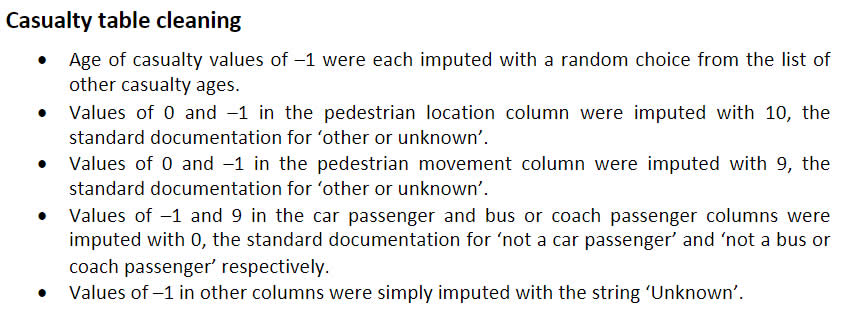

In [155]:
df_casualty[df_casualty['accident_index'] == '2020440349165'] #accident from accident table involving 41 casualties 

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
84377,569125,2020440349165,2020,440349165,1,1,2,1,15,3,3,0,0,0,4,0,11,2,6
84378,569126,2020440349165,2020,440349165,1,2,2,1,13,3,3,0,0,0,4,0,11,2,6
84379,569127,2020440349165,2020,440349165,1,3,2,2,14,3,3,0,0,0,4,0,11,2,10
84380,569128,2020440349165,2020,440349165,1,4,2,2,11,3,3,0,0,0,4,0,11,2,6
84381,569129,2020440349165,2020,440349165,1,5,2,1,13,3,3,0,0,0,4,0,11,2,6
84382,569130,2020440349165,2020,440349165,1,6,2,2,14,3,2,0,0,0,4,0,11,2,10
84383,569131,2020440349165,2020,440349165,1,7,2,2,15,3,2,0,0,0,4,0,11,2,6
84384,569132,2020440349165,2020,440349165,1,8,2,1,12,3,3,0,0,0,4,0,11,2,6
84385,569133,2020440349165,2020,440349165,1,9,2,1,13,3,3,0,0,0,4,0,11,2,6
84386,569134,2020440349165,2020,440349165,1,10,2,2,15,3,3,0,0,0,4,0,11,3,6


In [156]:
#Casualties all fell in the age group 11-15
#Casualties were all seated bus passengers
#A mixture of slight and serious injuries but mostly slight
'''Conclusion: accident involved a bus carrying children aged 11-15, the bus hit a bridge, making impact from the front.
Injuries sustained were mostly slight with only 5 serious injuries likely sustained by children seated in front.
This is a completely realisitic scenario. The value of 41 for number of casualties would therefore not be treated as an outlier.
No further investigation for outliers would be needed in the number of casualties column of the accident table'''

'Conclusion: accident involved a bus carrying children aged 11-15, the bus hit a bridge, making impact from the front.\nInjuries sustained were mostly slight with only 5 serious injuries likely sustained by children seated in front.\nThis is a completely realisitic scenario. The value of 41 for number of casualties would therefore not be treated as an outlier.\nNo further investigation for outliers would be needed in the number of casualties column of the accident table'

In [157]:
df_casualty['age_of_casualty'].unique()

array([31,  2,  4, 23, 47, 32, 33, 25, 41, 50, 62, 37, -1, 20, 42, 30, 18,
       26, 29, 38, 39, 80, 19, 21, 48,  7, 79, 45, 27, 44, 51, 83, 52, 43,
       22, 59, 60, 77, 12, 54, 10, 40, 56, 24, 88, 11,  9, 35,  5,  3, 16,
       57, 67,  6, 49, 46, 53, 28, 69, 15, 76, 36, 55, 61, 85, 34,  8, 87,
       58, 73, 64, 65,  0, 78, 71, 14, 13, 17,  1, 68, 91, 66, 92, 74, 75,
       63, 70, 84, 86, 94, 72, 90, 81, 82, 89, 93, 96, 95, 98, 99, 97],
      dtype=int64)

In [158]:
df_casualty['age_of_casualty'].max()

99

In [159]:
df_casualty['age_of_casualty'].min()

-1

In [160]:
#imputing age of casualty with a random choice from the existing list of ages 
choices = list(range(1, 100))

for index, row in df_casualty.iterrows():
    if row['age_of_casualty'] == -1:
        df_casualty.at[index, 'age_of_casualty'] = random.choice(choices)

In [161]:
df_casualty['pedestrian_location'].unique()

array([ 9,  1,  5,  4,  6,  0, 10,  8,  7,  3,  2, -1], dtype=int64)

In [162]:
df_casualty['pedestrian_location'] = df_casualty['pedestrian_location'].replace([0,-1],10)
#10 represents other or unknown

In [163]:
df_casualty['pedestrian_movement'].unique()

array([ 5,  1,  9,  0,  3,  2,  8,  4,  7,  6, -1], dtype=int64)

In [164]:
df_casualty['pedestrian_movement'] = df_casualty['pedestrian_movement'].replace([0,-1],9)
#9 represents other or unknown

In [165]:
df_casualty['car_passenger'].unique()

array([ 0,  1,  2,  9, -1], dtype=int64)

In [166]:
df_casualty['car_passenger'] = df_casualty['car_passenger'].replace([-1,9],0)
#0 represents not a car passenger

In [167]:
df_casualty['bus_or_coach_passenger'].unique()

array([ 0,  4,  3,  1,  2,  9, -1], dtype=int64)

In [168]:
df_casualty['bus_or_coach_passenger'] = df_casualty['bus_or_coach_passenger'].replace([-1,9],0)
#0 represents not a bus or coach passenger

In [169]:
df_casualty['age_of_casualty'].max()

99

In [170]:
df_casualty['age_of_casualty'].min()

0

In [171]:
df_casualty['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

In [172]:
df_casualty['casualty_severity'].unique()

array([3, 2, 1], dtype=int64)

In [173]:
df_casualty = df_casualty.replace([-1,'-1'], 'Unknown')

In [174]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  object
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  object
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

# Q: Are there significant hours of the day, and days of the week, on which accidents occur?

# Time of Day Analysis

splitting the day into 8 time segments
q1 = 00:00 - 02:59
q2 = 03:00 - 05:59
q3 = 06:00 - 08:59
q4 = 09:00 - 11:59
q5 = 12:00 - 14:59
q6 = 15:00 - 17:59
q7 = 18:00 - 20:59
q8 = 21:00 - 23:59

In [175]:
Timeframes = [ '00:00 – 02:59', '03:00 – 05:59', '06:00 – 08:59', '09:00 – 11:59', '12:00 – 14:59', '15:00 – 17:59', '18:00 – 20:59', '21:00 – 23:59']

In [176]:
incidents_general = []

In [177]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '00:%'"
                     " OR time LIKE '01:%'"
                     " OR time LIKE '02:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

2761


In [178]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '03:%'"
                     " OR time LIKE '04:%'"
                     " OR time LIKE '05:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

1929


In [179]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '06:%'"
                     " OR time LIKE '07:%'"
                     " OR time LIKE '08:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

10833


In [180]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '09:%'"
                     " OR time LIKE '10:%'"
                     " OR time LIKE '11:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

12902


In [181]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '12:%'"
                     " OR time LIKE '13:%'"
                     " OR time LIKE '14:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

17381


In [182]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '15:%'"
                     " OR time LIKE '16:%'"
                     " OR time LIKE '17:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

22555


In [183]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '18:%'"
                     " OR time LIKE '19:%'"
                     " OR time LIKE '20:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

15381


In [184]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND (time LIKE '21:%'"
                     " OR time LIKE '22:%'"
                     " OR time LIKE '23:%')").fetchall()
value = results[0][0]
print(value)
incidents_general.append(value)

7457


In [185]:
quadrants = {'Timeframe': Timeframes, 'Occurrences': incidents_general}
accident_distribution = pd.DataFrame(data=quadrants)
accident_distribution

,Timeframe,Occurrences
0,00:00 – 02:59,2761
1,03:00 – 05:59,1929
2,06:00 – 08:59,10833
3,09:00 – 11:59,12902
4,12:00 – 14:59,17381
5,15:00 – 17:59,22555
6,18:00 – 20:59,15381
7,21:00 – 23:59,7457


In [186]:
print(sum(incidents_general)) #checking that the total matches the total number of 2020 accidents (91199)

91199


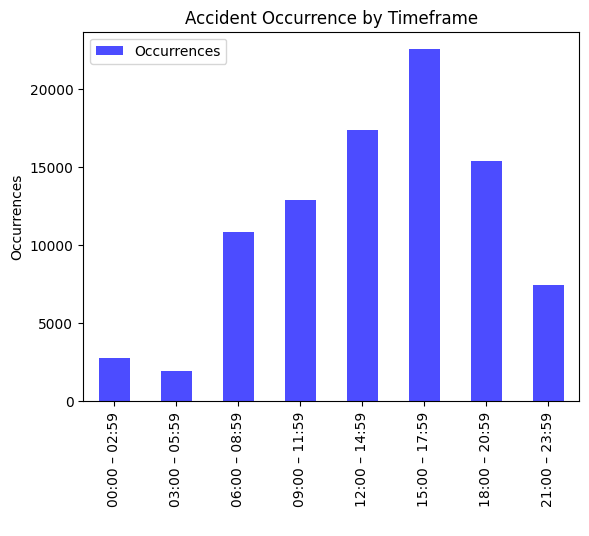

In [187]:
ax = accident_distribution.plot.bar(x='Timeframe', y='Occurrences', color='blue', alpha=0.7)

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Timeframe')
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Timeframe'], rotation=90)

# Display the plot
plt.show()

Highest number of accidents occur between 3pm and 6pm

Individual Hours Analysis

In [188]:
Hour = [ '00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [189]:
occurrences_general = []

In [190]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '00:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

1188


In [191]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '01:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

915


In [192]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '02:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

658


In [193]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '03:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

566


In [194]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '04:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

508


In [195]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '05:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

855


In [196]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '06:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

1830


In [197]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '07:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

3736


In [198]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '08:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

5267


In [199]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '09:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

3917


In [200]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '10:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

4173


In [201]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '11:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

4812


In [202]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '12:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

5395


In [203]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '13:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

5741


In [204]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '14:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

6245


In [205]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '15:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

7361


In [206]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '16:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

7381


In [207]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '17:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

7813


In [208]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '18:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

6618


In [209]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '19:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

5048


In [210]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '20:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

3715


In [211]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '21:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

3106


In [212]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '22:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

2555


In [213]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND time LIKE '23:%'").fetchall()
value = results[0][0]
print(value)
occurrences_general.append(value)

1796


In [214]:
Hours = {'Hour': Hour, 'Occurrences': occurrences_general}
accident_distribution = pd.DataFrame(data=Hours)
accident_distribution

,Hour,Occurrences
0,00,1188
1,01,915
2,02,658
3,03,566
4,04,508
5,05,855
6,06,1830
7,07,3736
8,08,5267
9,09,3917


In [215]:
print(sum(occurrences_general)) #checking that the total matches the total number of 2020 accidents (91199)

91199


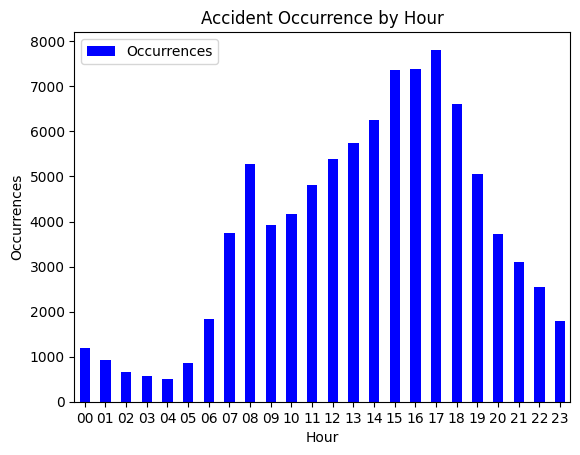

In [216]:
ax = accident_distribution.plot.bar(x='Hour', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Hour')
plt.xlabel('Hour')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Hour'], rotation=0)

# Display the plot
plt.show()

The highest number of accidents occured in the 17th hour

# Day of Week Analysis

In [217]:
days_count = []

In [218]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 1").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

10315


In [219]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 2").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

12772


In [220]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 3").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

13267


In [221]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 4").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

13564


In [222]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 5").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

14056


In [223]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 6").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

14889


In [224]:
results = cur.execute("SELECT COUNT(accident_index)"
                     " FROM accident"
                     " WHERE accident_year = 2020"
                     " AND day_of_week = 7").fetchall()

value = results[0][0]
print(value)
days_count.append(value)

12336


In [225]:
Days = {'Day': [ 'Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 
     'Occurrences': days_count}
accident_distribution = pd.DataFrame(data=Days)
accident_distribution

,Day,Occurrences
0,Day 1,10315
1,Day 2,12772
2,Day 3,13267
3,Day 4,13564
4,Day 5,14056
5,Day 6,14889
6,Day 7,12336


In [226]:
print(sum(days_count))  #checking that the total matches the total number of 2020 accidents (91199)

91199


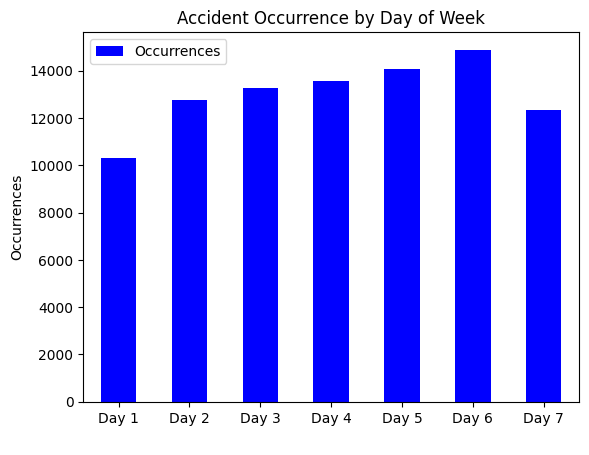

In [227]:
ax = accident_distribution.plot.bar(x='Day', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Day of Week')
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Day'], rotation=0)

# Display the plot
plt.show()

The highest number of accidents occured on day 6

In [228]:
# Calculate mean and standard deviation
mean_accidents = sum(days_count) / len(days_count)
standard_deviation = (sum((x - mean_accidents) ** 2 for x in days_count) / len(days_count)) ** 0.5

# Calculate coefficient of variation
coefficient_of_variation = (standard_deviation / mean_accidents) * 100

print(f"Mean accidents: {mean_accidents}")
print(f"Standard deviation: {standard_deviation}")
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")

Mean accidents: 13028.42857142857
Standard deviation: 1350.6236503548866
Coefficient of Variation: 10.37%


# Q: For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

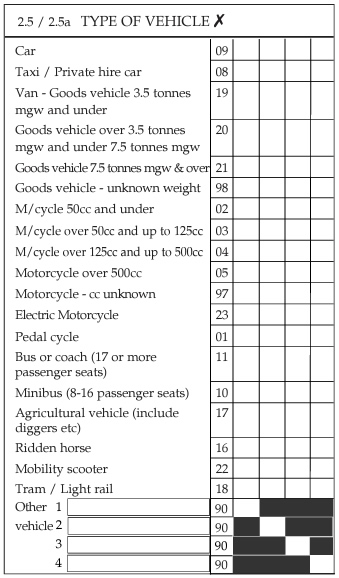

# Motorcycles (Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc (Vehicle types 2,3,4 and 5))

# Analysis using 8 time quadrants

In [229]:
incidents_motorcycles = []

In [230]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) " 
     #using vehicle index instead of accident index to account for cases involving multiple motorcycles
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (vehicle.accident_year = 2020) "
    "AND (time LIKE '00:%' OR time LIKE '01:%' OR time LIKE '02:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

245


In [231]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '03:%' OR time LIKE '04:%' OR time LIKE '05:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

201


In [232]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '06:%' OR time LIKE '07:%' OR time LIKE '08:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

1308


In [233]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '09:%' OR time LIKE '10:%' OR time LIKE '11:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

1645


In [234]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '12:%' OR time LIKE '13:%' OR time LIKE '14:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

2948


In [235]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '15:%' OR time LIKE '16:%' OR time LIKE '17:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

3764


In [236]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '18:%' OR time LIKE '19:%' OR time LIKE '20:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

2829


In [237]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '21:%' OR time LIKE '22:%' OR time LIKE '23:%')").fetchall()
value = results[0][0]
print(value)
incidents_motorcycles.append(value)

1186


In [238]:
print(sum(incidents_motorcycles)) #total number of accidents involving the specified motorcycle types

14126


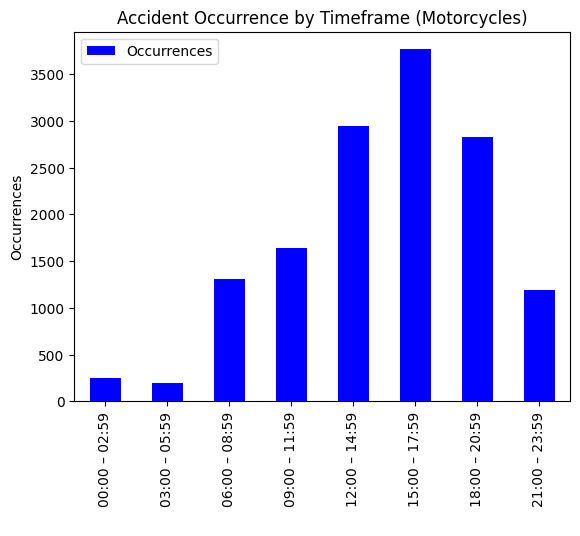

In [239]:
quadrants = {'Timeframe':  Timeframes, 'Occurrences': incidents_motorcycles}
accident_distribution = pd.DataFrame(data=quadrants)

ax = accident_distribution.plot.bar(x='Timeframe', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Timeframe (Motorcycles)') 
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Timeframe'], rotation=90)

# Display the plot
plt.show()

For Motorcycles, the most accidents occur between 3pm and 6pm

# Using individual hours of the day

In [240]:
occurrences_motorcycles = []

In [241]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    #using vehicle index instead of accident index to account for cases involving multiple motorcycles
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '00:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

101


In [242]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '01:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

95


In [243]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '02:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

49


In [244]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '03:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

42


In [245]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '04:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

43


In [246]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '05:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

116


In [247]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '06:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

259


In [248]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '07:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

550


In [249]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '08:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

499


In [250]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '09:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

422


In [251]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '10:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

531


In [252]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '11:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

692


In [253]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '12:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

853


In [254]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '13:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1036


In [255]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '14:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1059


In [256]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '15:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1134


In [257]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '16:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1229


In [258]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '17:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1401


In [259]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '18:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

1176


In [260]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '19:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

925


In [261]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '20:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

728


In [262]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '21:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

563


In [263]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '22:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

385


In [264]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '23:%')").fetchall()
value = results[0][0]
print(value)
occurrences_motorcycles.append(value)

238


In [265]:
print(sum(occurrences_motorcycles)) 
#checking that this figure matches the total number of accidents for the specified motorcycle types

14126


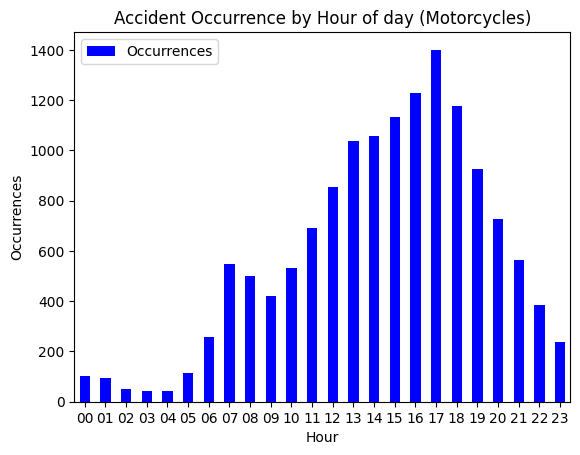

In [266]:
Hours = {'Hour': Hour, 'Occurrences': occurrences_motorcycles}
accident_distribution = pd.DataFrame(data=Hours)

ax = accident_distribution.plot.bar(x='Hour', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Hour of day (Motorcycles)')
plt.xlabel('Hour')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Hour'], rotation=0)

# Display the plot
plt.show()

For motorcycles, the highest number of accidents occurred in the 17th hour

# Day of week analysis

In [267]:
days_count_motorcycles = []

In [268]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    #using vehicle index instead of accident index to account for cases involving multiple motorcycles
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 1)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

1841


In [269]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 2)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

1868


In [270]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 3)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

1933


In [271]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 4)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

2001


In [272]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 5)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

2172


In [273]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 6)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

2308


In [274]:
results = cur.execute(
    "SELECT COUNT(vehicle.vehicle_index) "
    "FROM vehicle "
    "INNER JOIN accident ON accident.accident_index = vehicle.accident_index "
    "WHERE (vehicle_type = 2 OR vehicle_type = 3 OR vehicle_type = 4 OR vehicle_type = 5) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 7)").fetchall()
value = results[0][0]
print(value)
days_count_motorcycles.append(value)

2003


In [275]:
print(sum(days_count_motorcycles)) #checking that this figure matches the total calculated earlier

14126


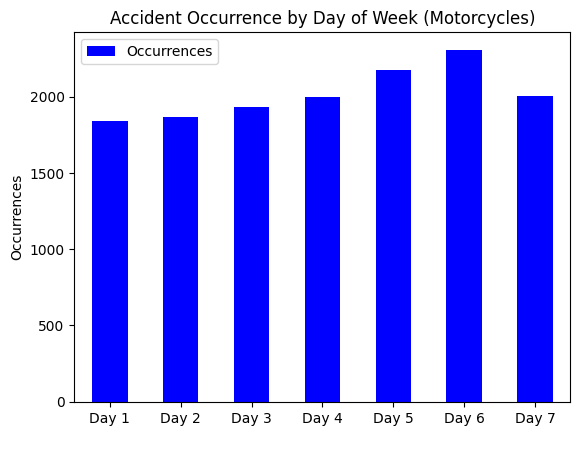

In [276]:
Days = {'Day': [ 'Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 
     'Occurrences': days_count_motorcycles}
accident_distribution = pd.DataFrame(data=Days)

ax = accident_distribution.plot.bar(x='Day', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Day of Week (Motorcycles)')
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Day'], rotation=0)

# Display the plot
plt.show()

For Motorcycles, day 6 had the highest number of accidents

In [277]:
# Calculate mean and standard deviation
mean_accidents = sum(days_count_motorcycles) / len(days_count_motorcycles)
standard_deviation = (sum((x - mean_accidents) ** 2 for x in days_count_motorcycles) / len(days_count_motorcycles)) ** 0.5

# Calculate coefficient of variation
coefficient_of_variation = (standard_deviation / mean_accidents) * 100

print(f"Mean accidents: {mean_accidents}")
print(f"Standard deviation: {standard_deviation}")
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")

Mean accidents: 2018.0
Standard deviation: 155.5561451235993
Coefficient of Variation: 7.71%


# Pedestrians (Casualty class 3)

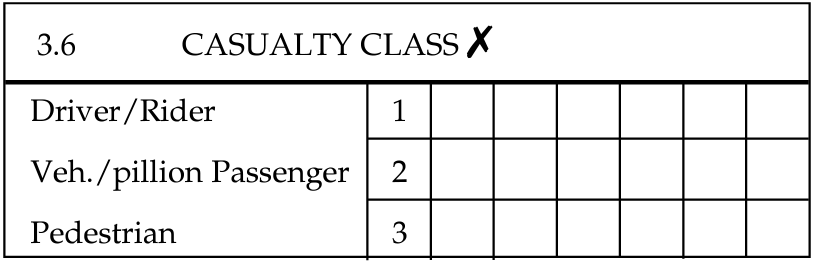

# Analysis using 8 time quadrants

In [278]:
incidents_pedestrians = []

In [279]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    #using casualty index instead of accident index to account for cases involving pedestrians
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '00:%' OR time LIKE '01:%' OR time LIKE '02:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

400


In [280]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '03:%' OR time LIKE '04:%' OR time LIKE '05:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

206


In [281]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '06:%' OR time LIKE '07:%' OR time LIKE '08:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

1747


In [282]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '09:%' OR time LIKE '10:%' OR time LIKE '11:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

1976


In [283]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '12:%' OR time LIKE '13:%' OR time LIKE '14:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

2657


In [284]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '15:%' OR time LIKE '16:%' OR time LIKE '17:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

4269


In [285]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '18:%' OR time LIKE '19:%' OR time LIKE '20:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

2488


In [286]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '21:%' OR time LIKE '22:%' OR time LIKE '23:%')").fetchall()
value = results[0][0]
print(value)
incidents_pedestrians.append(value)

1007


In [287]:
print(sum(incidents_pedestrians)) #total number of accidents involving pedestrians

14750


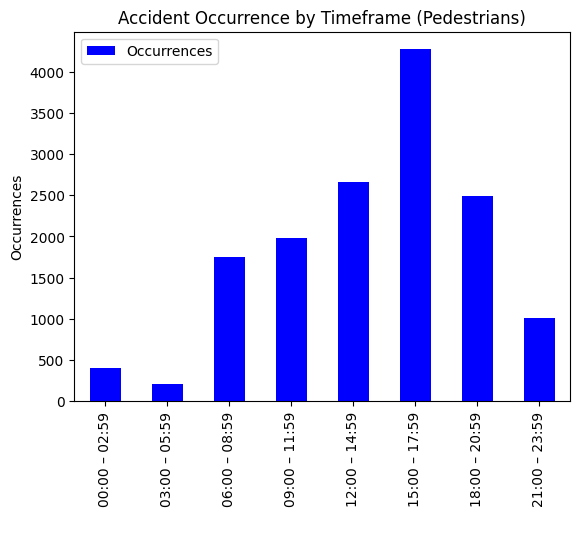

In [288]:
quadrants = {'Timeframe': Timeframes, 'Occurrences': incidents_pedestrians}
accident_distribution = pd.DataFrame(data=quadrants)

ax = accident_distribution.plot.bar(x='Timeframe', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Accident Occurrence by Timeframe (Pedestrians)') 
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Timeframe'], rotation=90)

# Display the plot
plt.show()

The highest number of accidents involving pedestrians occur between 3pm and 6pm

# Individual hour analysis

In [289]:
occurences_pedestrians = []

In [290]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    #using casualty index instead of accident index to account for cases involving pedestrians
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '00:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

173


In [291]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '01:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

144


In [292]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '02:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

83


In [293]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '03:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

82


In [294]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '04:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

50


In [295]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '05:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

74


In [296]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '06:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

173


In [297]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '07:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

514


In [298]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '08:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1060


In [299]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '09:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

607


In [300]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '10:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

644


In [301]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '11:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

725


In [302]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '12:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

809


In [303]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '13:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

833


In [304]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '14:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1015


In [305]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '15:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1672


In [306]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '16:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1323


In [307]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '17:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1274


In [308]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '18:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

1146


In [309]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '19:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

824


In [310]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '20:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

518


In [311]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '21:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

412


In [312]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '22:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

365


In [313]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (time LIKE '23:%')").fetchall()
value = results[0][0]
print(value)
occurences_pedestrians.append(value)

230


In [314]:
print(sum(occurences_pedestrians)) 
#checking that this figure matches the total number of accidents involving pedestrians calculated earlier

14750


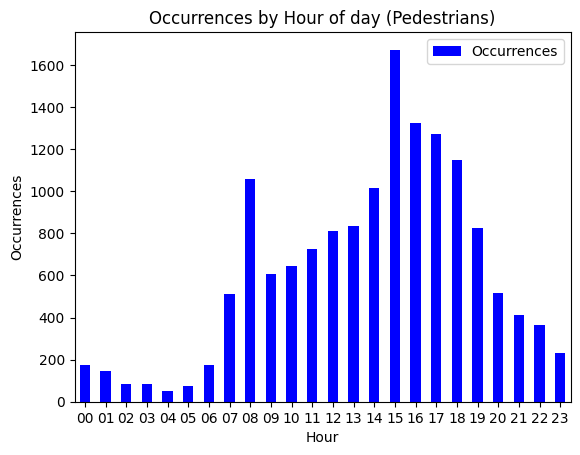

In [315]:
Hours = {'Hour': Hour, 'Occurrences': occurences_pedestrians}
accident_distribution = pd.DataFrame(data=Hours)

ax = accident_distribution.plot.bar(x='Hour', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Occurrences by Hour of day (Pedestrians)')
plt.xlabel('Hour')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Hour'], rotation=0)

# Display the plot
plt.show()

For Pedestrians, the 15th hour had the highest number of incidents

# Day of week analysis

In [316]:
days_count_pedestrians = []

In [317]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 1)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

1242


In [318]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 2)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

2207


In [319]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 3)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

2267


In [320]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 4)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

2247


In [321]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 5)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

2366


In [322]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 6)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

2543


In [323]:
results = cur.execute(
    "SELECT COUNT(casualty.casualty_index) "
    "FROM casualty "
    "INNER JOIN accident ON accident.accident_index = casualty.accident_index "
    "WHERE (casualty_class = 3) "
    "AND (accident.accident_year = 2020) "
    "AND (day_of_week = 7)").fetchall()
value = results[0][0]
print(value)
days_count_pedestrians.append(value)

1878


In [324]:
print(sum(days_count_pedestrians))
#checking that this matches with the total number of accidents involving pedestrians calculated earlier

14750


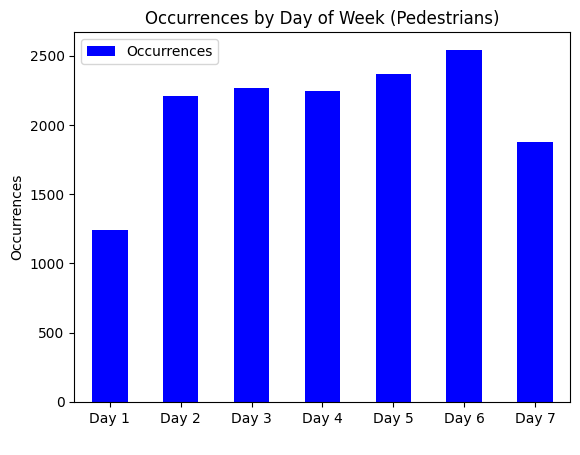

In [325]:
Days = {'Day': [ 'Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'], 
     'Occurrences': days_count_pedestrians}
accident_distribution = pd.DataFrame(data=Days)

ax = accident_distribution.plot.bar(x='Day', y='Occurrences', color='blue')

# Set plot title and axis labels (optional)
plt.title('Occurrences by Day of Week (Pedestrians)')
plt.xlabel(' ')
plt.ylabel('Occurrences')

ax.set_xticklabels(accident_distribution['Day'], rotation=0)

# Display the plot
plt.show()

The highest number of accidents involving pedestrians occur on day 6

In [326]:
# Calculate mean and standard deviation
mean_accidents = sum(days_count_pedestrians) / len(days_count_pedestrians)
standard_deviation = (sum((x - mean_accidents) ** 2 for x in days_count_pedestrians) / len(days_count_pedestrians)) ** 0.5

# Calculate coefficient of variation
coefficient_of_variation = (standard_deviation / mean_accidents) * 100

print(f"Mean accidents: {mean_accidents}")
print(f"Standard deviation: {standard_deviation}")
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")

Mean accidents: 2107.1428571428573
Standard deviation: 398.75571776336903
Coefficient of Variation: 18.92%


# APRIORI

Parameters to use: speed_limit, light_conditions, weather_conditions, road_surface_conditions

In [327]:
df_accident['accident_severity'].value_counts()

3    71453
2    18355
1     1391
Name: accident_severity, dtype: int64

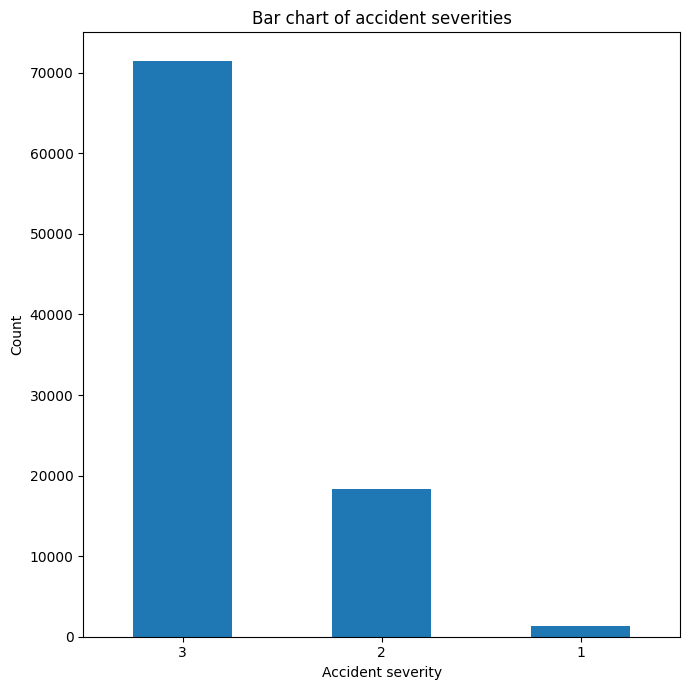

In [328]:
# Calculate the value counts (frequencies) of unique values in the column
value_counts = df_accident['accident_severity'].value_counts()

# Plot the bar chart
value_counts.plot(kind='bar', figsize=(7, 7))
plt.title('Bar chart of accident severities')
plt.xlabel('Accident severity')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

In [329]:
support_severity_1 = df_accident[df_accident['accident_severity'] == 1]['accident_index'].count()/df_accident['accident_index'].count()
support_severity_1

0.015252360223248062

In [330]:
support_severity_2 = df_accident[df_accident['accident_severity'] == 2]['accident_index'].count()/df_accident['accident_index'].count()
support_severity_2

0.20126317174530423

In [331]:
support_severity_3 = df_accident[df_accident['accident_severity'] == 3]['accident_index'].count()/df_accident['accident_index'].count()
support_severity_3

0.7834844680314477

In [332]:
#pip install mlxtend in command prompt if you havent already done so

In [333]:
from mlxtend.frequent_patterns import apriori, association_rules

In [334]:
#converting the selected variables to dummies
a_severity = pd.get_dummies(df_accident.accident_severity, prefix = "severity")
a_weather = pd.get_dummies(df_accident.weather_conditions, prefix = "weather")
a_speed = pd.get_dummies(df_accident.speed_limit, prefix = "speed")
a_light = pd.get_dummies(df_accident.light_conditions, prefix = "light")
a_surface = pd.get_dummies(df_accident.road_surface_conditions, prefix = "surface")

In [335]:
contributors = pd.concat([a_severity,a_weather,a_speed,a_light,a_surface],axis=1)

In [336]:
contributors

,severity_1,severity_2,severity_3,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,...,light_1,light_4,light_5,light_6,light_7,surface_1,surface_2,surface_3,surface_4,surface_5
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
91195,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
91196,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
91197,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [337]:
contributors.columns

Index(['severity_1', 'severity_2', 'severity_3', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'weather_5', 'weather_6', 'weather_7',
       'weather_8', 'weather_9', 'speed_20', 'speed_30', 'speed_40',
       'speed_50', 'speed_60', 'speed_70', 'light_1', 'light_4', 'light_5',
       'light_6', 'light_7', 'surface_1', 'surface_2', 'surface_3',
       'surface_4', 'surface_5'],
      dtype='object')

In [338]:
results1 = apriori(contributors, min_support=0.01, use_colnames=True)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


The minimum support of 0.01 was selected in order to include all accident severity types, considering that severity 1 (the lowest occurring accident type) had a calculated support of 0.01525

In [339]:
results1

,support,itemsets
0,0.015252,(severity_1)
1,0.201263,(severity_2)
2,0.783484,(severity_3)
3,0.775546,(weather_1)
4,0.127008,(weather_2)
...,...,...
342,0.015263,"(weather_1, surface_1, severity_3, speed_50, l..."
343,0.037566,"(weather_1, speed_60, surface_1, severity_3, l..."
344,0.016261,"(weather_1, speed_70, surface_1, severity_3, l..."
345,0.030307,"(weather_2, severity_3, surface_2, light_1, sp..."


In [340]:
rules =  association_rules(results1, metric = "lift", min_threshold=1)

The minimum lift of 1 was selected as values upwards of 1 show a positive correlation

In [341]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_1),0.775546,0.015252,0.012358,0.015934,1.044695,0.000529,1.000693,0.190607
1,(severity_1),(weather_1),0.015252,0.775546,0.012358,0.810208,1.044695,0.000529,1.182636,0.043445
2,(weather_1),(severity_2),0.775546,0.201263,0.160002,0.206309,1.025069,0.003913,1.006357,0.108956
3,(severity_2),(weather_1),0.201263,0.775546,0.160002,0.794988,1.025069,0.003913,1.094833,0.030618
4,(speed_40),(severity_2),0.086262,0.201263,0.018915,0.219270,1.089471,0.001553,1.023065,0.089876
...,...,...,...,...,...,...,...,...,...,...
1571,"(surface_2, speed_30)","(severity_3, light_4, weather_2)",0.153861,0.031568,0.020779,0.135048,4.277973,0.015922,1.119637,0.905578
1572,(light_4),"(severity_3, surface_2, weather_2, speed_30)",0.208632,0.054650,0.020779,0.099595,1.822430,0.009377,1.049917,0.570256
1573,(weather_2),"(severity_3, surface_2, light_4, speed_30)",0.127008,0.047511,0.020779,0.163602,3.443416,0.014744,1.138798,0.812826
1574,(surface_2),"(severity_3, speed_30, light_4, weather_2)",0.287722,0.021250,0.020779,0.072218,3.398456,0.014665,1.054935,0.990834


In [342]:
rules['consequents'].unique()

array([frozenset({'severity_1'}), frozenset({'weather_1'}),
       frozenset({'severity_2'}), frozenset({'speed_40'}),
       frozenset({'speed_60'}), frozenset({'speed_70'}),
       frozenset({'light_4'}), frozenset({'light_6'}),
       frozenset({'surface_2'}), frozenset({'weather_2'}),
       frozenset({'severity_3'}), frozenset({'weather_8'}),
       frozenset({'weather_9'}), frozenset({'speed_20'}),
       frozenset({'speed_30'}), frozenset({'light_1'}),
       frozenset({'light_7'}), frozenset({'surface_1'}),
       frozenset({'weather_5'}), frozenset({'speed_50'}),
       frozenset({'severity_2', 'speed_20'}),
       frozenset({'speed_30', 'severity_2'}),
       frozenset({'severity_2', 'speed_40'}),
       frozenset({'weather_1', 'severity_2'}),
       frozenset({'weather_1', 'speed_40'}),
       frozenset({'speed_60', 'severity_2'}),
       frozenset({'weather_1', 'speed_60'}),
       frozenset({'severity_2', 'light_1'}),
       frozenset({'weather_1', 'light_1'}),
       froz

In [343]:
filtered_rules = rules[rules['consequents'] == frozenset({'severity_3'})]
filtered_rules.sort_values("lift", ascending = False)
#filtering rules with only severity 3 as consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
958,"(speed_30, light_1, weather_9)",(severity_3),0.011689,0.783484,0.010285,0.879925,1.123092,0.001127,1.803168,0.110897
984,"(light_1, surface_1, weather_9)",(severity_3),0.015516,0.783484,0.013619,0.877739,1.120301,0.001462,1.770922,0.109075
239,"(light_1, weather_9)",(severity_3),0.017544,0.783484,0.015362,0.875625,1.117604,0.001617,1.740828,0.107107
230,"(surface_1, weather_8)",(severity_3),0.014847,0.783484,0.012961,0.872969,1.114214,0.001329,1.704430,0.104051
244,"(surface_1, weather_9)",(severity_3),0.022610,0.783484,0.019682,0.870514,1.111080,0.001968,1.672116,0.102288
234,"(speed_30, weather_9)",(severity_3),0.017412,0.783484,0.015154,0.870277,1.110778,0.001511,1.669061,0.101497
21,(weather_9),(severity_3),0.026579,0.783484,0.023081,0.868399,1.108381,0.002257,1.645247,0.100453
971,"(speed_30, surface_1, weather_9)",(severity_3),0.014989,0.783484,0.013015,0.868325,1.108286,0.001272,1.644315,0.099193
335,"(light_7, surface_1)",(severity_3),0.015823,0.783484,0.013662,0.863479,1.102101,0.001266,1.585949,0.094131
29,(light_7),(severity_3),0.024057,0.783484,0.020702,0.860529,1.098335,0.001853,1.552402,0.091738


As expected, severity 3 accidents, being the most frequent, are associated with so many different combinations of other parameters(59 in total)

In [344]:
filtered_rules = rules[rules['consequents'] == frozenset({'severity_2'})]
filtered_rules.sort_values("lift", ascending = False)
#filtering rules with only severity 2 as consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1299,"(weather_1, speed_60, surface_1, light_1)",(severity_2),0.058411,0.201263,0.018487,0.316501,1.572572,0.006731,1.168600,0.386686
711,"(speed_60, surface_1, light_1)",(severity_2),0.061064,0.201263,0.019156,0.313701,1.558660,0.006866,1.163832,0.381734
620,"(weather_1, speed_60, surface_1)",(severity_2),0.071635,0.201263,0.022106,0.308587,1.533252,0.007688,1.155224,0.374628
154,"(speed_60, surface_1)",(severity_2),0.075461,0.201263,0.023005,0.304853,1.514700,0.007817,1.149019,0.367538
607,"(weather_1, speed_60, light_1)",(severity_2),0.073268,0.201263,0.022127,0.302005,1.500550,0.007381,1.144331,0.359951
102,"(weather_1, speed_60)",(severity_2),0.095977,0.201263,0.028476,0.296698,1.474181,0.009160,1.135696,0.355806
149,"(speed_60, light_1)",(severity_2),0.090308,0.201263,0.026360,0.291889,1.450287,0.008184,1.127983,0.341304
6,(speed_60),(severity_2),0.125100,0.201263,0.035647,0.284950,1.415810,0.010469,1.117037,0.335685
12,(light_6),(severity_2),0.053016,0.201263,0.014518,0.273837,1.360590,0.003848,1.099941,0.279862
158,"(surface_2, speed_60)",(severity_2),0.045209,0.201263,0.011612,0.256852,1.276199,0.002513,1.074802,0.226670


Severity 2 accidents are related to a smaller set of combinations of other parameters (35 in total)

In [345]:
filtered_rules = rules[rules['consequents'] == frozenset({'severity_1'})]
filtered_rules.sort_values("lift", ascending = False)
#filtering rules with only severity 1 as consequents

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_1),0.775546,0.015252,0.012358,0.015934,1.044695,0.000529,1.000693,0.190607


severity 1 accidents showed a strong correlation with weather 1

# Q: Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region? 

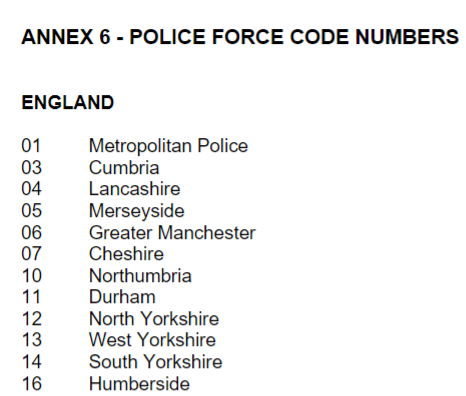

Using the police force code 16 from supporting documentation, information on accidents in the humberside region can be obtained

In [346]:
our_region_df = df_accident[df_accident["police_force"] == 16]
our_region_df
#creating a dataframe of accidents in the humberside region

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
37750,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,...,0,4,1,1,0,0,1,1,2,E01033109
37751,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,5,1,1,1,0,0,1,1,2,E01012777
37752,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,0,4,1,1,0,0,2,1,2,E01013325
37753,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,0,4,1,1,0,0,1,1,2,E01012788
37754,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,0,4,1,1,0,0,1,1,2,E01013220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,0,1,1,1,0,0,1,2,2,E01013239
39455,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,0,4,1,1,0,0,1,2,2,E01013041
39456,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,0,1,1,1,0,0,1,2,2,E01012907
39457,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,0,1,1,1,0,1,2,2,1,E01013286


# Clustering

In [347]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

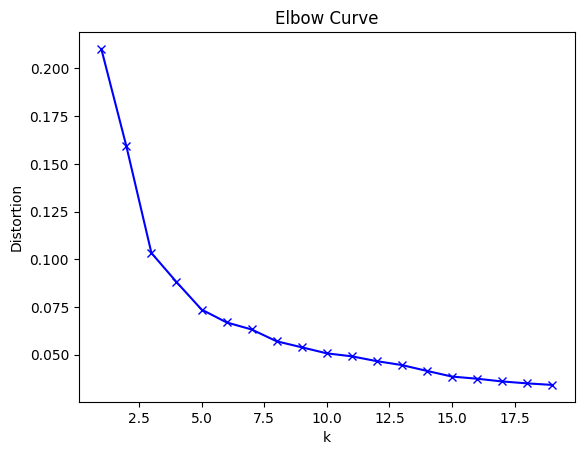

In [348]:
X = our_region_df[['longitude', 'latitude']]

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()
#plotting an elbow curve to choose optimal k for clustering

In [349]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [350]:
labels = kmeans.predict(X)

In [351]:
centroids = kmeans.cluster_centers_

In [352]:
labels

array([1, 1, 2, ..., 1, 2, 1])

In [353]:
centroids

array([[-0.09171857, 53.5760808 ],
       [-0.36169907, 53.75931872],
       [-0.64560345, 53.59169822],
       [-0.27142383, 54.04468253],
       [-0.82599074, 53.80968918]])

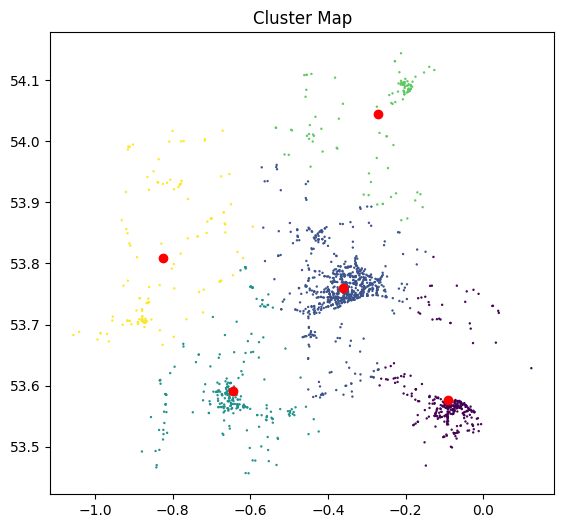

In [354]:
fig = plt.figure(figsize = (6.5,6))
plt.scatter(our_region_df['longitude'], our_region_df['latitude'], c = labels, cmap = 'viridis', s = 0.5)
plt.scatter(centroids[:,0], centroids[:,1], color = 'red')
plt.title('Cluster Map')
plt.show()

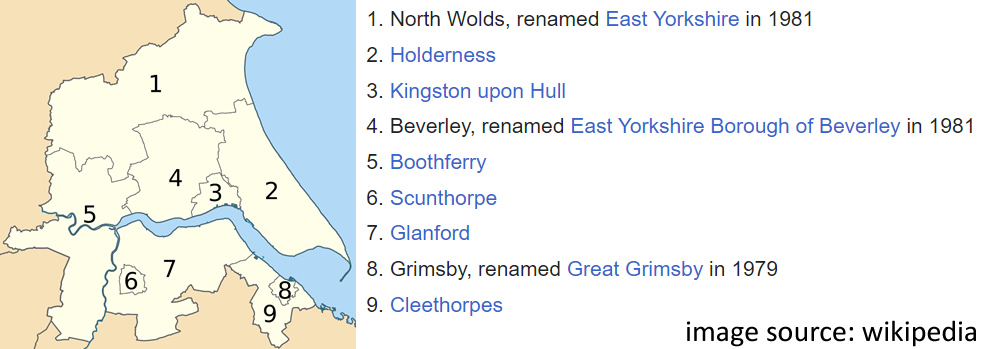

The accident points were evenly distributed across the entire Humberside region except for some major accident hotspots (dense accumulation of points) which correspond to region 3 (Kingston Upon Hull), region 6 (Scunthorpe) and region 8 (Grimsby) on the map of Humberside. Other minor hotspots include the northeastern parts of East Yorkshire, Central Beverley and the Eastern part of Boothferry.

# Outlier Detection

In [355]:
import scipy.stats as stats

In [356]:
#Numerical parameters to check:
#number of casualties from accident table
#age of driver from vehicle table
#age of vehicle from vehicle table
#engine capacity from vehicle table

# Age of Driver

In [357]:
df_vehicle_drv = df_vehicle[df_vehicle['age_of_driver'] != 'Unknown']

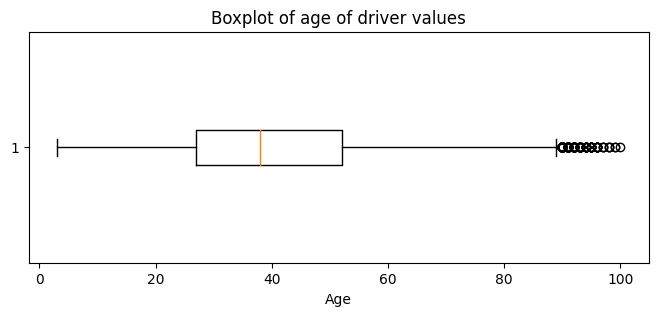

In [358]:
plt.figure(figsize=(8,3))
plt.boxplot(df_vehicle_drv['age_of_driver'], vert=False)
plt.title('Boxplot of age of driver values')
plt.xlabel('Age')
plt.show()

In [359]:
df_vehicle_drv["age_of_driver"].min()

3

In [360]:
df_vehicle_drv["age_of_driver"].max()

100

# IQR Test

In [361]:
upper_age_driver = df_vehicle_drv["age_of_driver"].quantile(0.75)
lower_age_driver = df_vehicle_drv["age_of_driver"].quantile(0.25)
iqr_driver = upper_age_driver - lower_age_driver
upper_age_limit_drv = upper_age_driver + 1.5*iqr_driver
lower_age_limit_drv = lower_age_driver - 1.5*iqr_driver

In [362]:
upper_age_limit_drv

89.5

In [363]:
lower_age_limit_drv

-10.5

# Grubbs Test

In [364]:
avg = df_vehicle_drv["age_of_driver"].mean()
avg

40.26492907776798

In [365]:
absvalues = abs(df_vehicle_drv["age_of_driver"] - avg)
absvalues

0          8.264929
1          4.735071
3          3.735071
4         20.264929
5         15.264929
            ...    
167370    16.735071
167371     2.264929
167372    27.735071
167373    35.735071
167374     1.264929
Name: age_of_driver, Length: 144031, dtype: object

In [366]:
maxvalue = max(absvalues)
maxvalue

59.73507092223202

In [367]:
stdev = df_vehicle_drv["age_of_driver"].std()
stdev

16.283385017280203

In [368]:
Grubbs = maxvalue/stdev
print(Grubbs)

3.668467634883051


In [369]:
def get_critical_G(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size -2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
    critical_value = numerator / denominator
    
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [370]:
Gcritical = get_critical_G(len(df_vehicle_drv), 0.05)

Grubbs Critical Value: 5.095646872243806


G < G Critical, Thefefore there was no outlier identified

Grubbs test does not identify any outliers, however from an understanding of uk driving laws, the minimum driver age should be 16 and any driver age below 16 should be treated as an outlier

In [371]:
df_vehicle_drv[df_vehicle_drv["age_of_driver"] < 16]

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
994,682710,2020010229954,2020,010229954,2,1,0,5,7,3,...,6,1,14,3,Unknown,Unknown,Unknown,Unknown,3,1
1559,683275,2020010231061,2020,010231061,2,1,0,7,2,4,...,4,1,11,3,Unknown,Unknown,Unknown,Unknown,3,1
1611,683327,2020010231149,2020,010231149,2,1,0,18,7,3,...,6,1,15,3,Unknown,Unknown,Unknown,Unknown,4,1
1884,683600,2020010231596,2020,010231596,2,1,0,5,8,4,...,6,2,15,3,Unknown,Unknown,Unknown,Unknown,3,1
1969,683685,2020010231747,2020,010231747,2,1,0,18,3,7,...,4,2,9,2,Unknown,Unknown,Unknown,Unknown,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166397,848113,2020990998438,2020,990998438,2,1,0,18,1,5,...,5,2,8,2,Unknown,Unknown,Unknown,Unknown,2,1
166545,848261,2020991000258,2020,991000258,2,1,0,18,5,8,...,4,1,11,3,Unknown,Unknown,Unknown,Unknown,7,3
166679,848395,2020991002377,2020,991002377,2,1,0,18,4,7,...,6,1,13,3,Unknown,Unknown,Unknown,Unknown,9,1
167023,848739,2020991007892,2020,991007892,1,1,0,18,8,5,...,5,1,15,3,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In order to conduct a thorough analysis and provide meaningful recommendations, it is necessary to work with a dataframe consisting only of legally eligible drivers. Therefore, any drivers who are below the age of 16 will be considered as outliers and subsequently removed from the dataframe. By doing so, we ensure that the analysis is focused on the target population of legal drivers, allowing for more accurate insights and appropriate suggestions to be derived.

The accidents indexes would be noted and used to drop these accidents from the accident and casualty table as well

In [372]:
underage_indexes = df_vehicle_drv[df_vehicle_drv["age_of_driver"] < 16]['accident_index'].unique().tolist()

In [373]:
filtered_df_vehicle = df_vehicle[~df_vehicle['accident_index'].isin(underage_indexes)]

In [374]:
filtered_df_vehicle['age_of_driver'].unique()

array([32, 45, 'Unknown', 44, 20, 25, 41, 19, 26, 62, 37, 40, 33, 51, 30,
       18, 29, 24, 38, 77, 48, 50, 79, 42, 52, 22, 31, 28, 57, 81, 59, 67,
       34, 23, 54, 53, 27, 39, 56, 43, 88, 35, 46, 16, 49, 21, 80, 66, 55,
       47, 60, 36, 58, 70, 71, 17, 85, 69, 61, 87, 73, 64, 65, 63, 83, 78,
       72, 68, 82, 74, 75, 76, 86, 90, 91, 84, 89, 93, 94, 92, 97, 95, 98,
       100, 99, 96], dtype=object)

In [375]:
filtered_df_accident = df_accident[~df_accident['accident_index'].isin(underage_indexes)]

In [376]:
filtered_df_casualty = df_casualty[~df_casualty['accident_index'].isin(underage_indexes)]

# Age of Vehicle

In [377]:
df_vehicle_veh = df_vehicle[df_vehicle['age_of_vehicle'] != 'Unknown']

In [378]:
df_vehicle_veh["age_of_vehicle"].min()

0

In [379]:
df_vehicle_veh["age_of_vehicle"].max()

96

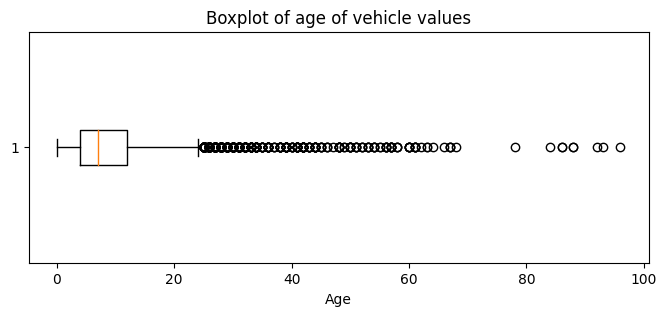

In [380]:
plt.figure(figsize=(8,3))
plt.boxplot(df_vehicle_veh['age_of_vehicle'], vert=False)
plt.title('Boxplot of age of vehicle values')
plt.xlabel('Age')
plt.show()

# Grubbs Test

In [381]:
df_vehicle_grubbs = df_vehicle[df_vehicle['age_of_vehicle'] != 'Unknown']

In [382]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()
avg

8.183993950266688

In [383]:
absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)
absvalues

0         2.183994
1         6.183994
3         0.183994
4         4.183994
5         3.183994
            ...   
167369    1.183994
167370    6.183994
167371    6.183994
167372    7.183994
167374    6.183994
Name: age_of_vehicle, Length: 124303, dtype: object

In [384]:
maxvalue = max(absvalues)
maxvalue

87.81600604973332

In [385]:
stdev = df_vehicle_grubbs["age_of_vehicle"].std()
stdev

5.681596034032845

In [386]:
Grubbs = maxvalue/stdev
print(Grubbs)

15.456221372254229


In [387]:
def get_critical_G(size, alpha):
    tdist = stats.t.ppf(1 - alpha / (2 * size), size -2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
    critical_value = numerator / denominator
    
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [388]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067641648891948


Grubbs test identifies one outlier. The vehicle with the maximum age would be dropped and grubbs test would be repeated

In [389]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 96]

In [390]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

14.9426310916023


In [391]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067640115458791


Another outlier identified

In [392]:
df_vehicle_grubbs['age_of_vehicle'].max()

93

In [393]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 94]

In [394]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

14.9426310916023


In [395]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067640115458791


Another outlier identified

In [396]:
df_vehicle_grubbs['age_of_vehicle'].max()

93

In [397]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 93]

In [398]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

14.779796923146066


In [399]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.06763858193241


To avoid having to repeat this too many times, I would make jump some figures during the iteration and slow down when the values begin to converge.

In [400]:
df_vehicle_grubbs['age_of_vehicle'].unique()

array([6, 2, 8, 4, 5, 0, 1, 14, 9, 16, 20, 12, 10, 13, 18, 7, 3, 19, 22,
       15, 11, 17, 28, 21, 32, 24, 25, 23, 27, 30, 26, 29, 31, 34, 37, 44,
       39, 57, 38, 51, 54, 33, 62, 46, 43, 41, 48, 45, 36, 58, 60, 64, 86,
       50, 61, 53, 35, 55, 49, 92, 88, 42, 67, 84, 40, 52, 66, 56, 78, 47,
       68, 63], dtype=object)

In [401]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 76]

In [402]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

10.604800068893244


In [403]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067627846949323


In [404]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 71]

In [405]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

10.604800068893244


In [406]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067627846949323


In [407]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 61]

In [408]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

9.237890314758133


In [409]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.0676063750491


In [410]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 56]

In [411]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

8.397595127783699


In [412]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067577230640143


In [413]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 51]

In [414]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

7.534835347773972


In [415]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.0675511500871115


In [416]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 46]

In [417]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

6.66183580944513


In [418]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067521996989424


In [419]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 41]

In [420]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.7981122465402075


In [421]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067456001693456


In [422]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 39]

In [423]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.446540931532475


In [424]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.0674299040119335


In [425]:
df_vehicle_veh = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 38]

In [426]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.446540931532475


In [427]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.0674299040119335


In [428]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 37]

In [429]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.088609675670541


In [430]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.0674130152231545


In [431]:
df_vehicle_grubbs = df_vehicle_grubbs[df_vehicle_grubbs['age_of_vehicle'] < 36]

In [432]:
avg = df_vehicle_grubbs["age_of_vehicle"].mean()

absvalues = abs(df_vehicle_grubbs["age_of_vehicle"] - avg)

maxvalue = max(absvalues)

stdev = df_vehicle_grubbs["age_of_vehicle"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

4.911341158601268


In [433]:
Gcritical = get_critical_G(len(df_vehicle_grubbs), 0.05)

Grubbs Critical Value: 5.067397660574709


Grubbs test stopped identifying outliers when the vehicle ages in the dataset were all <36, meaning grubbs test identifies vehicles aged 36years and above as outliers

In [434]:
df_vehicle_veh = df_vehicle[df_vehicle['age_of_vehicle'] != 'Unknown']

In [435]:
df_vehicle_veh[df_vehicle_veh['age_of_vehicle'] > 36].sort_values("age_of_vehicle", ascending = False)

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
143617,825333,2020500954946,2020,500954946,1,9,0,18,3,7,...,5,1,70,10,3705,1,96,Unknown,2,2
165209,846925,2020990980802,2020,990980802,1,5,5,18,6,2,...,5,1,62,9,976,1,93,Unknown,6,3
64149,745865,20201379K1053,2020,1379K1053,2,9,0,18,4,8,...,6,1,36,7,747,1,92,Unknown,10,1
71464,753180,2020160983383,2020,160983383,1,9,0,13,3,7,...,5,1,78,11,1645,1,88,Unknown,10,3
145115,826831,2020500988344,2020,500988344,1,9,0,4,3,7,...,5,1,81,11,847,1,88,Unknown,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164958,846674,2020990977378,2020,990977378,1,3,0,5,7,3,...,5,1,55,8,1074,1,38,SUZUKI MODEL MISSING,3,2
85543,767259,2020230936709,2020,230936709,1,5,0,4,2,6,...,5,1,70,10,1100,1,38,SUZUKI MODEL MISSING,1,1
5988,687704,2020010238567,2020,010238567,2,4,0,13,4,8,...,2,1,55,8,124,1,37,Unknown,5,1
70316,752032,2020160950261,2020,160950261,2,4,0,18,3,7,...,6,1,57,9,143,1,37,Unknown,8,2


Grubbs test identified cars aged above 36 years as outliers. The 149 vehicles aged between 36 and 96 years were however left in the table and not treated as outliers as these vehicles could still be in use provided the owners ensure that they meet current road worthiness standards.

# Engine Capacity

In [436]:
df_vehicle_eng = df_vehicle[df_vehicle['engine_capacity_cc'] != 'Unknown']

In [437]:
df_vehicle_eng['engine_capacity_cc'].max()

17696

In [438]:
df_vehicle_eng['engine_capacity_cc'].min()

7

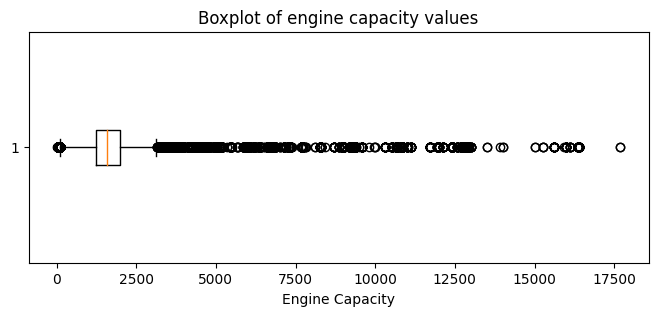

In [439]:
plt.figure(figsize=(8,3))
plt.boxplot(df_vehicle_eng['engine_capacity_cc'], vert=False)
plt.title('Boxplot of engine capacity values')
plt.xlabel('Engine Capacity')
plt.show()

# Grubbs Test

In [440]:
df_veh_eng_new = df_vehicle[df_vehicle['engine_capacity_cc'] != 'Unknown']

In [441]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

9.745127545506094


In [442]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 5.103745708118049


In [443]:
#precisely one outlier

In [444]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1000]

In [445]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

9.413012286181393


In [446]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 5.071416466912709


In [447]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1500]

In [448]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

7.9714093744138586


In [449]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.996079371576154


In [450]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1700]

In [451]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

6.894047069473836


In [452]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.932449746985997


In [453]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1900]

In [454]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

6.39587520435506


In [455]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.900498372557338


In [456]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1950]

In [457]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

6.320186760795124


In [458]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.895507659961986


In [459]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1975]

In [460]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.81786903735357


In [461]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.860689702391481


In [462]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1985]

In [463]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.720872153734998


In [464]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.8535453433654325


In [465]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1990]

In [466]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.6940858638784295


In [467]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.85154562028283


In [468]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1993]

In [469]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.654174703898555


In [470]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.84854571710196


In [471]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1995]

In [472]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.2001680768382235


In [473]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.812266710642386


In [474]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1996]

In [475]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

5.193912348566154


In [476]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.8117356231693496


In [477]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1997]

In [478]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

4.9426986493540905


In [479]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.789577322649433


In [480]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1998]

In [481]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

4.7740338828279185


In [482]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.773664679784537


In [483]:
df_veh_eng_new = df_veh_eng_new[df_veh_eng_new['engine_capacity_cc'] > 1999]

In [484]:
avg = df_veh_eng_new["engine_capacity_cc"].mean()

absvalues = abs(df_veh_eng_new["engine_capacity_cc"] - avg)

maxvalue = max(absvalues)

stdev = df_veh_eng_new["engine_capacity_cc"].std()

Grubbs = maxvalue/stdev
print(Grubbs)

4.675714257702546


In [485]:
Gcritical = get_critical_G(len(df_veh_eng_new), 0.05)

Grubbs Critical Value: 4.763935285595621


Grubbs test put the minimum engine capacity at 1998cc as it stopped identifying outliers after 1998cc. This is however unrealistic as some vehicle types like scooters and motorbikes have engine capacities that fall below that figure

In [486]:
df_vehicle_eng.sort_values("engine_capacity_cc", ascending = False).head(10)

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
119837,801553,2020432004071,2020,432004071,1,9,4,18,1,5,...,6,1,Unknown,Unknown,17696,Unknown,Unknown,Unknown,Unknown,Unknown
103354,785070,2020361015654,2020,361015654,1,9,0,9,6,3,...,5,2,37,7,17696,1,15,VAUXHALL VECTRA,10,2
150787,832503,2020530936011,2020,530936011,1,21,0,5,5,1,...,5,1,41,7,16400,Unknown,Unknown,Unknown,2,1
86135,767851,2020230976039,2020,230976039,1,21,1,18,7,1,...,1,1,52,8,16400,Unknown,Unknown,Unknown,6,1
166274,847990,2020990996383,2020,990996383,1,21,1,18,3,7,...,1,1,27,6,16400,2,4,SCANIA MODEL MISSING,Unknown,Unknown
148844,830560,2020522003122,2020,522003122,2,21,0,12,5,1,...,6,3,Unknown,Unknown,16400,2,4,SCANIA MODEL MISSING,Unknown,Unknown
61511,743227,20201372P1618,2020,1372P1618,2,21,1,18,8,4,...,1,1,Unknown,Unknown,16400,2,5,SCANIA MODEL MISSING,Unknown,Unknown
9024,690740,2020010243817,2020,010243817,2,21,1,5,3,7,...,1,1,45,7,16400,2,5,SCANIA MODEL MISSING,8,1
16879,698595,2020010255429,2020,010255429,2,21,9,16,9,9,...,6,3,Unknown,Unknown,16400,2,5,SCANIA MODEL MISSING,Unknown,Unknown
41920,723636,2020040967033,2020,040967033,1,21,0,18,1,5,...,6,3,Unknown,Unknown,16400,2,5,SCANIA MODEL MISSING,Unknown,Unknown


In [487]:
df_vehicle_eng.sort_values("engine_capacity_cc", ascending = True).head(10)

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
54612,736328,2020100922336,2020,100922336,2,8,0,18,7,3,...,1,1,43,7,7,2,15,SEAT ALHAMBRA,Unknown,Unknown
122166,803882,2020440231580,2020,440231580,1,2,0,18,8,4,...,6,1,21,5,42,1,17,PIAGGIO LIBERTY,3,1
75756,757472,2020200951010,2020,200951010,1,2,0,13,4,8,...,6,1,Unknown,Unknown,48,Unknown,Unknown,Unknown,Unknown,Unknown
141977,823693,2020480964301,2020,480964301,1,2,0,9,7,5,...,2,2,55,8,48,1,9,PIAGGIO VESPA,9,1
132,681848,2020010228300,2020,010228300,2,2,0,18,2,6,...,6,1,16,4,48,1,11,PIAGGIO VESPA,6,1
84385,766101,2020220983132,2020,220983132,2,2,0,18,1,5,...,5,1,16,4,48,1,3,Unknown,6,3
25719,707435,2020010268075,2020,010268075,1,2,0,3,1,5,...,2,1,44,7,48,1,7,PIAGGIO VESPA,7,1
149338,831054,2020522004279,2020,522004279,1,2,0,18,2,6,...,6,1,17,4,48,1,3,Unknown,7,1
70098,751814,2020160944810,2020,160944810,1,2,0,4,7,3,...,6,1,16,4,48,1,3,Unknown,9,2
155335,837051,2020552001146,2020,552001146,2,2,0,3,2,6,...,1,1,16,4,48,1,0,Unknown,5,1


In [488]:
filtered_df_vehicle.loc[54612, 'engine_capacity_cc'] = 1984
#too low for a car (vehicle type 2), replaced with known engine capacity for that particular vehicle
#https://www.cars-data.com/en/seat-alhambra/engine-capacity

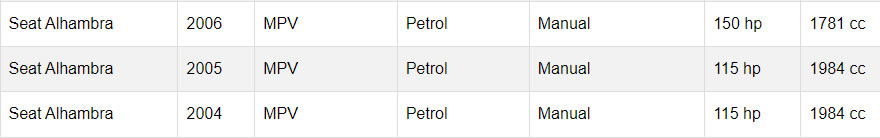

In [489]:
filtered_df_vehicle[filtered_df_vehicle['engine_capacity_cc'] != 'Unknown']['engine_capacity_cc'].min()

42

In [490]:
filtered_df_vehicle[filtered_df_vehicle['engine_capacity_cc'] != 'Unknown']['engine_capacity_cc'].max()

17696

# Classification Model

In [491]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [492]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import StackingClassifier

# Creating a new dataframe combining columns from the accident, casualty and vehicle tables

In [748]:
indexes = filtered_df_accident['accident_index'].unique().tolist()
#getting the list of unique accident indexes in the cleaned accident table, with all outliers removed

In [749]:
casualty_table = filtered_df_casualty[filtered_df_casualty['accident_index'].isin(indexes)]

In [750]:
# Drop duplicate rows based on 'accident_index', keeping the first occurrence
unique_casualty_table = casualty_table.drop_duplicates(subset=['accident_index'], keep='first')

In [751]:
vehicle_table = filtered_df_vehicle[filtered_df_vehicle['accident_index'].isin(indexes)]

In [752]:
# Drop duplicate rows based on 'accident_index', keeping the first occurrence
unique_vehicle_table = vehicle_table.drop_duplicates(subset=['accident_index'], keep='first')

In [753]:
#dropping irrelevant columns and columns with a large fraction of imputed values
accident_table_imp = filtered_df_accident.drop('did_police_officer_attend_scene_of_accident', axis = 1)
accident_table_imp = accident_table_imp.drop('second_road_number', axis = 1)
accident_table_imp = accident_table_imp.drop('second_road_class', axis = 1)
accident_table_imp = accident_table_imp.drop('junction_control', axis = 1)

In [754]:
accident_table_imp = accident_table_imp.reset_index(drop=True) #resetting index for the concatenation to follow

In [755]:
unique_casualty_table = unique_casualty_table.reset_index(drop=True) #resetting index for the concatenation to follow

In [756]:
unique_vehicle_table = unique_vehicle_table.reset_index(drop=True) #resetting index for the concatenation to follow

In [757]:
General_df = pd.concat([accident_table_imp, unique_casualty_table, unique_vehicle_table], axis=1) 

In [758]:
General_df = General_df.drop('casualty_index', axis = 1) #irrelevant column
General_df = General_df.drop('accident_year', axis = 1) #irrelevant column, could introduce bias
General_df = General_df.drop('vehicle_reference', axis = 1) #irrelevant column
General_df = General_df.drop('casualty_reference', axis = 1) #irrelevant column
General_df = General_df.drop('vehicle_index', axis = 1) #irrelevant column
General_df = General_df.drop('casualty_severity', axis = 1) #too strongly correlated with the target variable and could introduce bias
General_df = General_df.drop('casualty_type', axis = 1) #too strongly correlated with the target variable and could introduce bias

In [759]:
General_df = General_df.select_dtypes([np.number]) #keeping only columns with numerical values

In [760]:
General_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89376 entries, 0 to 89375
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   location_easting_osgr                    89376 non-null  float64
 1   location_northing_osgr                   89376 non-null  float64
 2   longitude                                89376 non-null  float64
 3   latitude                                 89376 non-null  float64
 4   police_force                             89376 non-null  int64  
 5   accident_severity                        89376 non-null  int64  
 6   number_of_vehicles                       89376 non-null  int64  
 7   number_of_casualties                     89376 non-null  int64  
 8   day_of_week                              89376 non-null  int64  
 9   local_authority_district                 89376 non-null  int64  
 10  first_road_class                         89376

# Classification using general dataframe

In [761]:
General_df['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [762]:
General_df['accident_severity'] = General_df['accident_severity'].replace(1,0)

In [763]:
General_df['accident_severity'] = General_df['accident_severity'].replace([2,3],1)

In [764]:
General_df['accident_severity'].unique()

array([1, 0], dtype=int64)

In [765]:
y = General_df['accident_severity']

In [766]:
General_df['accident_severity'].value_counts()

1    87993
0     1383
Name: accident_severity, dtype: int64

In [767]:
y.value_counts()

1    87993
0     1383
Name: accident_severity, dtype: int64

In [768]:
df_bal, y_bal = RandomUnderSampler().fit_resample(General_df, y)

In [769]:
df_bal['accident_severity'].value_counts()

0    1383
1    1383
Name: accident_severity, dtype: int64

In [770]:
y_bal.value_counts()

0    1383
1    1383
Name: accident_severity, dtype: int64

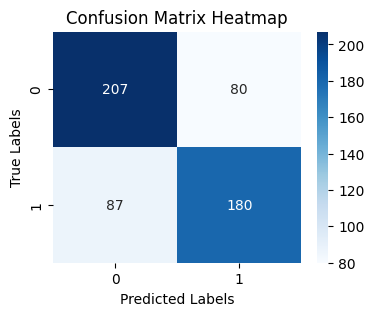

Cross-validation Scores:
[0.72911964 0.72460497 0.67873303 0.7239819  0.71945701]
Mean Cross-validation Accuracy: 0.7151793101334996


In [771]:
X = df_bal.drop('accident_severity', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y_bal, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(min_samples_leaf = 50, random_state=42)

cv_scores = cross_val_score(dtree, X_train, y_train, cv=5)

#Train the classifier on the training data
dtree.fit(X_train, y_train)

#Make predictions on the test data
y_pred = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Print the cross-validation scores
print("Cross-validation Scores:")
print(cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())

In [772]:
df_importance = pd.DataFrame(np.array([dtree.feature_names_in_, dtree.feature_importances_]).T, columns = ['Feature','Importance'])

In [773]:
df_importance_sorted = df_importance.sort_values(by='Importance', ascending=False)
top_features = df_importance_sorted.head(10)['Feature'].tolist()
top_features

['speed_limit',
 'number_of_vehicles',
 'age_of_casualty',
 'vehicle_manoeuvre',
 'light_conditions',
 'first_road_number',
 'number_of_casualties',
 'hit_object_off_carriageway',
 'longitude',
 'first_road_class']

In [774]:
df_importance.sort_values('Importance', ascending = False)

,Feature,Importance
12,speed_limit,0.401259
5,number_of_vehicles,0.191442
24,age_of_casualty,0.104806
30,vehicle_manoeuvre,0.084184
16,light_conditions,0.076328
10,first_road_number,0.034085
6,number_of_casualties,0.027895
33,hit_object_off_carriageway,0.02092
2,longitude,0.017639
9,first_road_class,0.010228


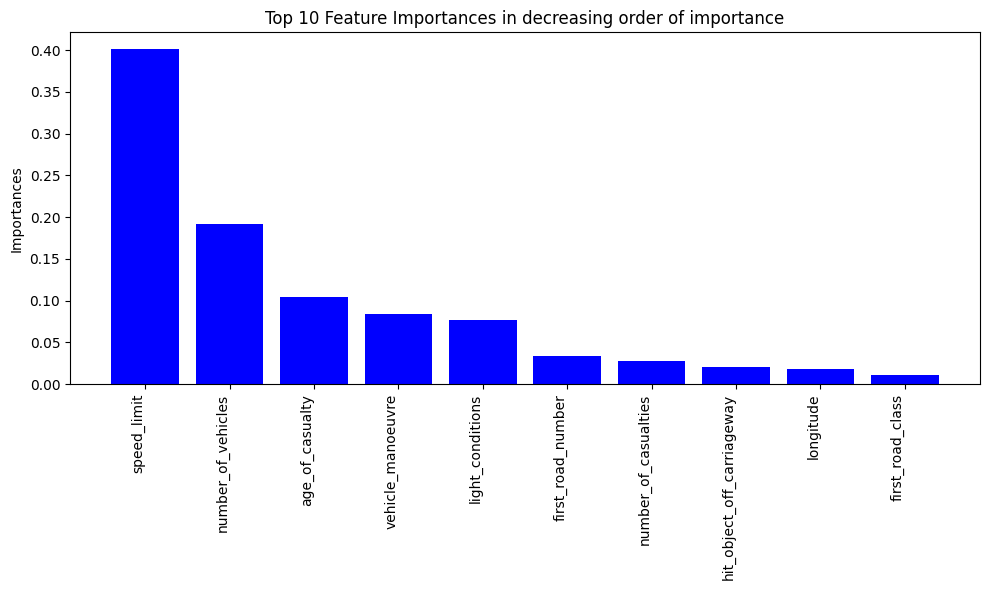

In [775]:
plt.figure(figsize=(10, 6))
plt.bar(df_importance.sort_values('Importance', ascending = False).head(10)['Feature'], 
        df_importance.sort_values('Importance', ascending = False).head(10)['Importance'], color='blue')

plt.ylabel('Importances')
plt.title('Top 10 Feature Importances in decreasing order of importance')

plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

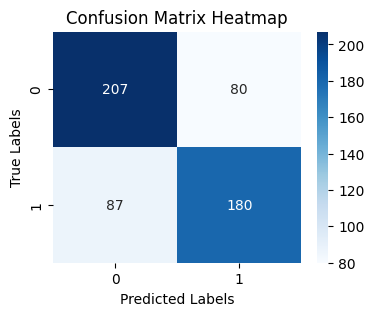

Classification Report for Cross-Validation:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1096
           1       0.75      0.74      0.75      1116

    accuracy                           0.75      2212
   macro avg       0.75      0.75      0.75      2212
weighted avg       0.75      0.75      0.75      2212

Mean Accuracy Score: 0.7481916817359855


In [776]:
#Repeating the classification using a stacking classifier and top features

X = df_bal[top_features]

X_train, X_test, y_train, y_test = train_test_split(X, y_bal, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
bayes = GaussianNB()
svc = SVC()
log_reg = LogisticRegression(max_iter=1000, random_state=42)

estimators = [('decision_tree', dtree),('gradient_boosting', gboost),('k_neighbors', knn), ('naive_bayes', bayes),
             ('support_vector', svc)]

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=log_reg)

# Perform 5-fold cross-validation and get the predicted labels for each fold
y_train_pred = cross_val_predict(stacking_classifier, X_train, y_train, cv=5)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report for Cross-Validation:")
print(classification_report(y_train, y_train_pred))

# Calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_score(y_train, y_train_pred))
print("Mean Accuracy Score:", mean_accuracy)

# Checking for relationsips between the top features and fatal accidents

In [522]:
fatal_df = df_bal[df_bal['accident_severity']==0]  #creating a dataframe of fatal accidents only
fatal_df

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,vehicle_type,vehicle_manoeuvre,skidding_and_overturning,hit_object_in_carriageway,hit_object_off_carriageway,first_point_of_impact
0,553007.0,190580.0,0.207510,51.593297,1,0,1,1,4,15,...,10,9,0,0,9,11,1,0,4,1
1,509181.0,172567.0,-0.430454,51.441583,1,0,1,1,5,25,...,10,9,0,0,3,17,0,0,2,0
2,509650.0,184487.0,-0.420010,51.548632,1,0,2,1,6,26,...,10,9,0,0,21,18,0,0,0,1
3,534071.0,176697.0,-0.070962,51.473359,1,0,1,1,4,8,...,5,1,0,0,21,5,0,0,0,1
4,527080.0,176147.0,-0.171763,51.470029,1,0,2,1,7,10,...,7,9,0,0,9,18,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,254367.0,661245.0,-4.326142,55.822415,1,0,1,1,2,926,...,6,9,0,0,9,17,1,10,5,4
1379,270790.0,659812.0,-4.063523,55.814225,0,0,2,1,2,938,...,8,3,0,0,9,18,0,0,0,3
1380,113410.0,903322.0,-6.842655,57.926736,0,0,1,1,5,941,...,10,9,0,0,19,18,5,0,9,1
1381,381609.0,654146.0,-2.294786,55.780278,30,0,2,1,6,914,...,10,9,0,0,9,18,0,0,0,1


In [523]:
fatal_df['speed_limit'].mode()[0]   

60

In [524]:
#the speed limit associated with fatal accidents the most is 60

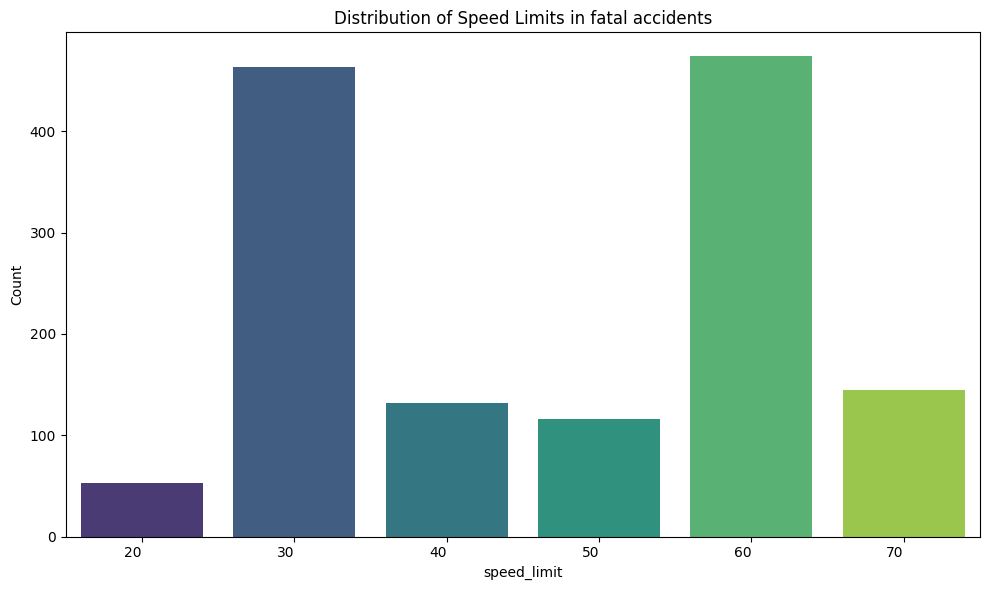

In [525]:
sl_counts = fatal_df['speed_limit'].value_counts().reset_index()
sl_counts.columns = ['speed_limit', 'count']

sl_counts = sl_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='speed_limit', y='count', data=sl_counts, palette='viridis')

plt.xlabel('speed_limit')
plt.ylabel('Count')
plt.title('Distribution of Speed Limits in fatal accidents')
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2456\414789248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatal_df['age_band'] = pd.cut(fatal_df['age_of_casualty'], bins=age_bins, labels=age_labels, right=False)


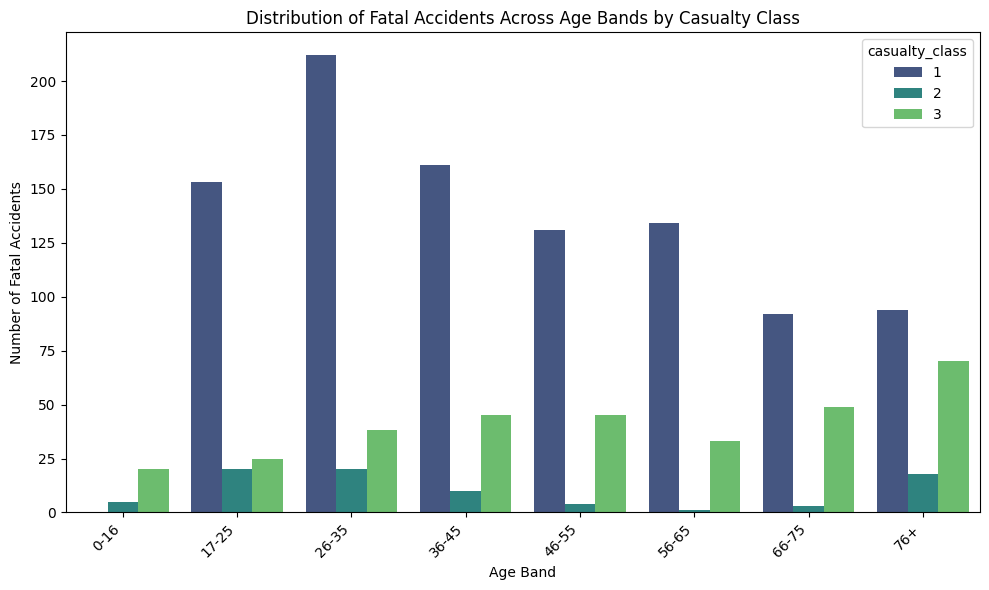

In [526]:
#Defining age bands
age_bins = [0, 16, 25, 35, 45, 55, 65, 75, 100]

#Creating labels for the age bands
age_labels = ['0-16', '17-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']

#Grouping the age_of_casualty column into age bands
fatal_df['age_band'] = pd.cut(fatal_df['age_of_casualty'], bins=age_bins, labels=age_labels, right=False)

#Grouping by age bands and casualty_class, and counting the number of accidents in each group
age_class_counts = fatal_df.groupby(['age_band', 'casualty_class'])['casualty_class'].count().reset_index(name='fatal_accidents_count')

#Sorting the age bands in ascending order
age_class_counts = age_class_counts.sort_values(by='age_band')

#Creating a bar plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(x='age_band', y='fatal_accidents_count', hue='casualty_class', data=age_class_counts, palette='viridis')

plt.xlabel('Age Band')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents Across Age Bands by Casualty Class')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


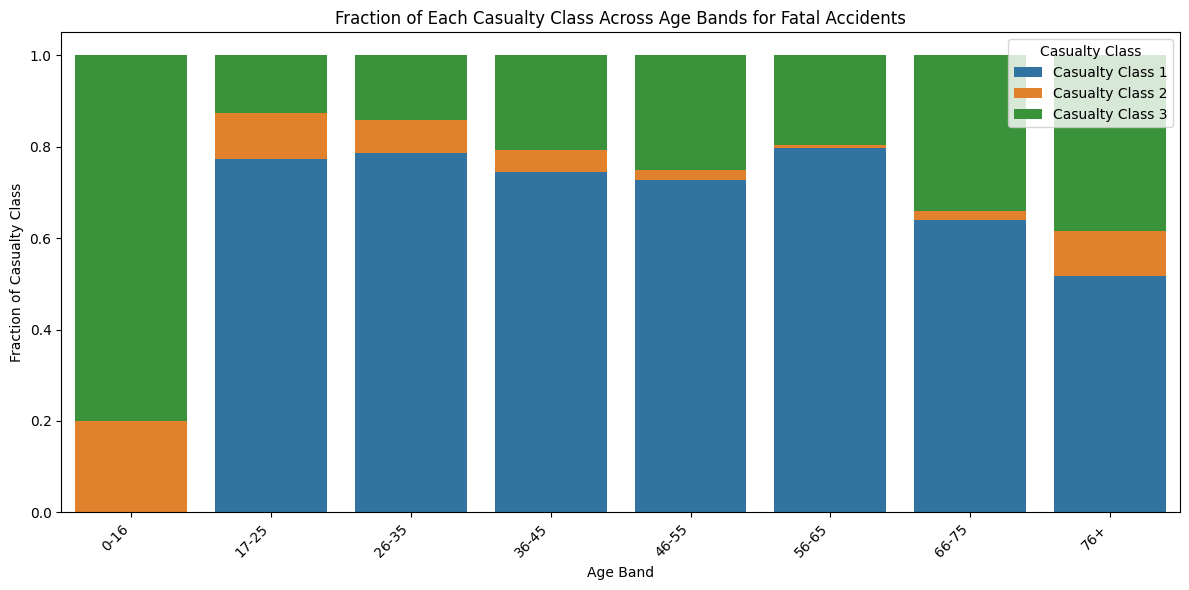

In [527]:
#Pivot table to get counts of each casualty_class for each age band
pivot_table = age_class_counts.pivot_table(index='age_band', columns='casualty_class', values='fatal_accidents_count', fill_value=0)

#Calculate the fraction of each casualty_class for each age band
pivot_table['total_casualties'] = pivot_table[1] + pivot_table[2] + pivot_table[3]
pivot_table['fraction_casualty_class_1'] = pivot_table[1] / pivot_table['total_casualties']
pivot_table['fraction_casualty_class_2'] = pivot_table[2] / pivot_table['total_casualties']
pivot_table['fraction_casualty_class_3'] = pivot_table[3] / pivot_table['total_casualties']

#Creating a bar plot to visualize the fraction of each casualty_class for each age band
plt.figure(figsize=(12, 6))
sns.barplot(x=pivot_table.index, y='fraction_casualty_class_1', data=pivot_table, color='tab:blue', label='Casualty Class 1')
sns.barplot(x=pivot_table.index, y='fraction_casualty_class_2', data=pivot_table, color='tab:orange', bottom=pivot_table['fraction_casualty_class_1'], label='Casualty Class 2')
sns.barplot(x=pivot_table.index, y='fraction_casualty_class_3', data=pivot_table, color='tab:green', bottom=pivot_table['fraction_casualty_class_1']+pivot_table['fraction_casualty_class_2'], label='Casualty Class 3')

plt.xlabel('Age Band')
plt.ylabel('Fraction of Casualty Class')
plt.title('Fraction of Each Casualty Class Across Age Bands for Fatal Accidents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Casualty Class')

plt.tight_layout()
plt.show()

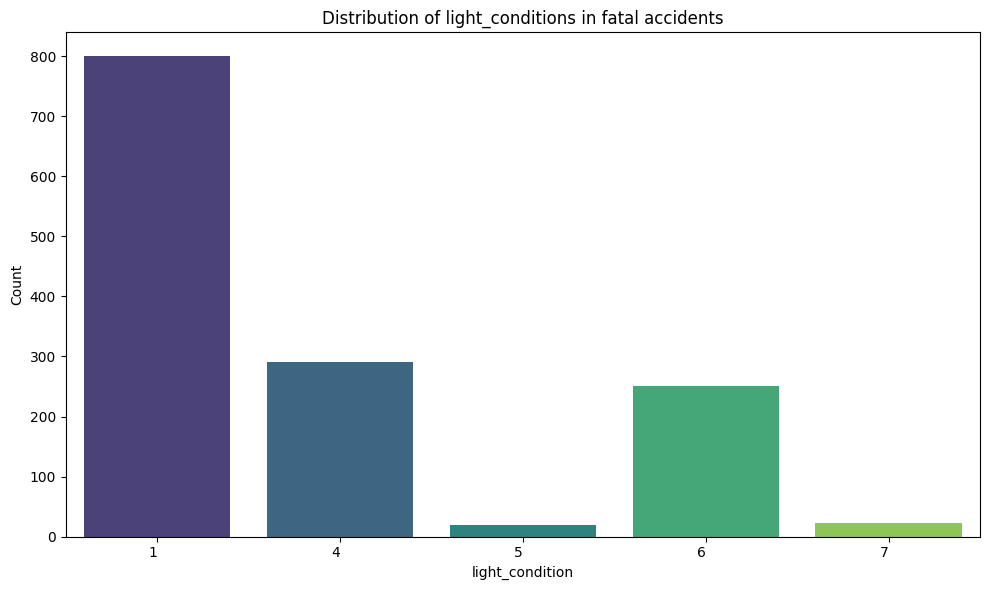

In [528]:
lc_counts = fatal_df['light_conditions'].value_counts().reset_index()
lc_counts.columns = ['light_conditions', 'count']

lc_counts = lc_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='light_conditions', y='count', data=lc_counts, palette='viridis')

plt.xlabel('light_condition')
plt.ylabel('Count')
plt.title('Distribution of light_conditions in fatal accidents')
plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

In [529]:
#most fatal accidents occur under light condition 1, daylight.